In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")
# 解决中文乱码问题
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"]=False # 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
# 魔法函数
%matplotlib inline 

In [2]:
# 连接mysql数据库
import pymysql.cursors
# 连接数据库
conn = pymysql.connect(host = 'localhost',port = 3306,user = 'root',password = '123456',charset = 'utf8')

In [3]:
pd.read_sql('show databases',conn)

,Database
0,information_schema
1,da
2,findreport
3,jd3c
4,mysql
5,performance_schema
6,sys
7,tableau
8,ts


In [4]:
pd.read_sql('use jd3c',conn)

TypeError: 'NoneType' object is not iterable

In [5]:
pd.read_sql('show tables',conn)

,Tables_in_jd3c
0,b
1,china
2,china_orgin_dim
3,dim
4,order_detail
5,order_platform
6,order_platform_detail
7,payment_pattern
8,product
9,product_category


In [6]:
# 用户表
users = pd.read_sql('select * from users',conn)
# 订单明细表
order_detail = pd.read_sql('select * from order_detail',conn)
# 商品表
product = pd.read_sql('select * from product',conn)
# 地区表
dim = pd.read_sql('select * from china_orgin_dim',conn)

In [7]:
users = pd.DataFrame(users)
order_detail = pd.DataFrame(order_detail)
product = pd.DataFrame(product)
dim = pd.DataFrame(dim)

# 按ctrl+/ 可以快速注释
display('用户表数据量：',len(users))
display('订单明细表数据量：',len(order_detail))
display('商品表数据量：',len(product))
display('地区表数据量：',len(dim))

'用户表数据量：'

10077

'订单明细表数据量：'

639000

'商品表数据量：'

2450

'地区表数据量：'

292

In [ ]:
'''
用户表字段说明：
user_no：用户编号  -- 与order_detail表的user_no连接
user_name：用户名
name：姓名
age：年龄
sex：性别
phone_no：电话
c_id：地区编号    -- 与dim表的c_id进行连接
'''

In [8]:
# 用户表
users.head()

,user_no,user_name,name,age,sex,phone_no,c_id
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007
1,1100003136,ykyyepWjtn,杨辉,28,2,17698948844,104001008
2,1100003137,SbrzsSCdqS,李素英,27,2,17639183776,104001009
3,1100003138,camjMsXmru,刘洁,25,2,17692971321,104001010
4,1100003139,eOmyLrDOLL,吴美玲,24,2,17639758215,104001011


In [ ]:
'''
订单明细表字段说明：
order_no：订单编号  
order_date：订单日期
pid：商品编号                   -- 与product表的pid进行连接
amount：数量
platform_no：订购平台           
user_no：用户编号               -- 与users表的user_no进行连接
payment_pattern_no：支付类型    
'''

In [9]:
# 订单明细表
order_detail.head()

,order_no,order_date,pid,amount,platform_no,user_no,payment_pattern_no
0,20180301000009,2018-03-01 09:56:46,1190399,5,13,1900958420,11006
1,20180301000010,2018-03-01 09:04:38,1383102426,3,14,1693099630,11003
2,20180301000011,2018-03-01 15:37:24,1255655215,4,13,1153728430,11003
3,20180301000012,2018-03-01 02:50:48,1220040,10,16,1922039140,11005
4,20180301000013,2018-03-01 17:52:28,1349471389,5,19,1540040860,11007


In [ ]:
'''
商品表字段说明：
pid：商品编号                -- 与order_detail表的pid进行连接
title：商品名称
sell_point：商品描述          
price：商品价格
cid：商品类型  
created：创建时间      
updated：更新时间      
'''

In [10]:
# 商品表
product.head()

,pid,title,sell_point,price,cid,created,updated
0,536563,new2 - 阿尔卡特 (OT-927) 炭黑 联通3G手机 双卡双待,清仓！仅北京，武汉仓有货！,299.0,560,2015-03-08 21:33:18,2015-04-11 20:38:38
1,562379,new8- 三星 W999 黑色 电信3G手机 双卡双待双通,下单送12000毫安移动电源！双3.5英寸魔焕炫屏，以非凡视野纵观天下时局，尊崇翻盖设计，张...,1100.0,560,2015-03-08 21:27:54,2015-04-12 17:10:43
2,605616,阿尔卡特 (OT-979) 冰川白 联通3G手机,清仓！仅上海仓有货！,309.0,560,2015-03-08 21:33:18,2015-03-08 21:33:18
3,635906,阿尔卡特 (OT-927) 单电版 炭黑 联通3G手机 双卡双待,清仓！仅北京，武汉仓有货！,249.0,560,2015-03-08 21:33:18,2015-03-08 21:33:18
4,679532,阿尔卡特 (OT-986+) 玫红 AK47 加强版 联通3G手机,仅上海，广州，沈阳仓有货！预购从速！,499.0,560,2015-03-08 21:32:31,2015-03-08 21:32:31


In [ ]:
'''
地区表字段说明：
d_id：地区编号                
d_name：地区名称
p_id：省份/直辖市编号          
p_name：省份/直辖市名称
c_id：地区编号                  -- 与users表的c_id进行连接
c_name：地区名称          
'''

In [11]:
# 地区表
dim.tail()

,d_id,d_name,p_id,p_name,c_id,c_name
287,106,西北地区,106005,新疆维吾尔自治区,106005002,克拉玛依市
288,107,华北地区,107001,北京市,107000001,北京市
289,107,华东地区,107002,上海市,107000002,上海市
290,107,华北地区,107003,天津市,107000003,天津市
291,107,西南地区,107004,重庆市,107000004,重庆市


# 分析目的
分析用户属性，消费行为，构建用户画像

# 思路
用户属性分析（整体人群画像）
- 男女占比
- 年龄段占比
- 地区/省份/城市TOP10分布

用户购买手机偏好(TGI)分析
- 不同性别对手机品牌的偏好TOP10
- 不同年龄段对手机品牌的偏好TOP10
- 不同地区对手机品牌的偏好TOP10
- 不同城市级别对手机品牌的偏好TOP10

RFM模型
- R:最近一次购买时间
- F：购买的频次
- M：购买的金额

# 数据清洗

In [12]:
display(product.info())        # 产品表
print('-'*100)
display(users.info())          # 用户表
print('-'*100)
display(order_detail.info())   # 订单明细表
print('-'*100)
display(dim.info())            # 地区表
print('-'*100)

# 小结：数据没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   pid         2450 non-null   int64         
 1   title       2450 non-null   object        
 2   sell_point  2450 non-null   object        
 3   price       2450 non-null   float64       
 4   cid         2450 non-null   int64         
 5   created     2450 non-null   datetime64[ns]
 6   updated     2450 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 134.1+ KB


None

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10077 entries, 0 to 10076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_no    10077 non-null  int64 
 1   user_name  10077 non-null  object
 2   name       10077 non-null  object
 3   age        10077 non-null  int64 
 4   sex        10077 non-null  int64 
 5   phone_no   10077 non-null  int64 
 6   c_id       10077 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.2+ KB


None

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639000 entries, 0 to 638999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_no            639000 non-null  int64         
 1   order_date          639000 non-null  datetime64[ns]
 2   pid                 639000 non-null  int64         
 3   amount              639000 non-null  int64         
 4   platform_no         639000 non-null  int64         
 5   user_no             639000 non-null  int64         
 6   payment_pattern_no  639000 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 34.1 MB


None

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   d_id    292 non-null    int64 
 1   d_name  292 non-null    object
 2   p_id    292 non-null    int64 
 3   p_name  292 non-null    object
 4   c_id    292 non-null    int64 
 5   c_name  292 non-null    object
dtypes: int64(3), object(3)
memory usage: 13.8+ KB


None

----------------------------------------------------------------------------------------------------


In [14]:
# 判断该表每一列是否有空值，any()代表只有某列有一个缺失值，则该列返回True
display(product.isnull().any())                 # 产品表
display(users.isnull().any())                   # 用户表
display(order_detail.isnull().any())            # 订单明细表
display(dim.isnull().any())                     # 地区表

pid           False
title         False
sell_point    False
price         False
cid           False
created       False
updated       False
dtype: bool

user_no      False
user_name    False
name         False
age          False
sex          False
phone_no     False
c_id         False
dtype: bool

order_no              False
order_date            False
pid                   False
amount                False
platform_no           False
user_no               False
payment_pattern_no    False
dtype: bool

d_id      False
d_name    False
p_id      False
p_name    False
c_id      False
c_name    False
dtype: bool

In [15]:
display(product[product.duplicated()])        # 产品表
display(users[users.duplicated()])          # 用户表
display(order_detail[order_detail.duplicated()])   # 订单明细表
display(dim[dim.duplicated()])            # 地区表

# 小结：数据没有重复值

,pid,title,sell_point,price,cid,created,updated


,user_no,user_name,name,age,sex,phone_no,c_id


,order_no,order_date,pid,amount,platform_no,user_no,payment_pattern_no


,d_id,d_name,p_id,p_name,c_id,c_name


# 一、用户属性分析
- 男女占比
- 年龄段占比
- 地区/省份/城市TOP10分布

## 1.男女占比分析

In [16]:
# 用户表和地区表进行连接
df = users.merge(dim,left_on='c_id',right_on='c_id',how = 'left')
df.head()

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市
1,1100003136,ykyyepWjtn,杨辉,28,2,17698948844,104001008,104,华中地区,104001,河南省,开封市
2,1100003137,SbrzsSCdqS,李素英,27,2,17639183776,104001009,104,华中地区,104001,河南省,洛阳市
3,1100003138,camjMsXmru,刘洁,25,2,17692971321,104001010,104,华中地区,104001,河南省,商丘市
4,1100003139,eOmyLrDOLL,吴美玲,24,2,17639758215,104001011,104,华中地区,104001,河南省,许昌市


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10077 entries, 0 to 10076
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_no    10077 non-null  int64 
 1   user_name  10077 non-null  object
 2   name       10077 non-null  object
 3   age        10077 non-null  int64 
 4   sex        10077 non-null  int64 
 5   phone_no   10077 non-null  int64 
 6   c_id       10077 non-null  int64 
 7   d_id       10077 non-null  int64 
 8   d_name     10077 non-null  object
 9   p_id       10077 non-null  int64 
 10  p_name     10077 non-null  object
 11  c_name     10077 non-null  object
dtypes: int64(7), object(5)
memory usage: 1023.4+ KB


男    2816
女    7261
Name: user_no, dtype: int64

占比:男性：27.94%，女性：72.06%


Text(0.5, 1.0, '男女占比')

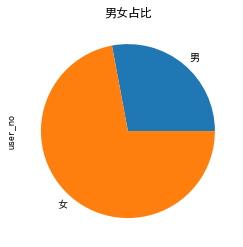

In [42]:
gender = df.groupby('sex')['user_no'].count()
gender.index = ['男','女']
display(gender)
gender_male = round((gender.values[0] / (gender.values[0]+gender.values[1]))*100,2)
gender_female = round((gender.values[1] / (gender.values[0]+gender.values[1]))*100,2)
print('占比:男性：{}%，女性：{}%'.format(gender_male,gender_female))
gender.plot(kind = 'pie')
plt.title('男女占比')

### 小结：女性占比超过70%，男性人数不足30%

## 2.年龄段占比分析

In [30]:
# 查看年龄最值
print('年龄最小值：',min(df['age']))
print('年龄最大值：',max(df['age']))
df.info()

年龄最小值： 16
年龄最大值： 56
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10077 entries, 0 to 10076
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_no    10077 non-null  int64 
 1   user_name  10077 non-null  object
 2   name       10077 non-null  object
 3   age        10077 non-null  int64 
 4   sex        10077 non-null  int64 
 5   phone_no   10077 non-null  int64 
 6   c_id       10077 non-null  int64 
 7   d_id       10077 non-null  int64 
 8   d_name     10077 non-null  object
 9   p_id       10077 non-null  int64 
 10  p_name     10077 non-null  object
 11  c_name     10077 non-null  object
dtypes: int64(7), object(5)
memory usage: 1023.4+ KB


In [31]:
# 年龄段划分。由于数据是2015年的数据，所以年龄划分是针对2015年
lst = []
for i in range(len(df)):
    if df['age'][i] <= 20:
        lst.append('20岁及以下')  # 95后
    elif df['age'][i] <= 25:
        lst.append('21-25岁')     # 90后
    elif df['age'][i] <= 30:
        lst.append('26-30岁')    # 85后
    elif df['age'][i] <= 35:
        lst.append('31-35岁')    # 80后
    elif df['age'][i] <= 40:
        lst.append('36-40岁')    # 75后
    elif df['age'][i] <= 45:
        lst.append('41-45岁')    # 70后
    else:
        lst.append('46岁及以上') # 70前
df['age_range'] = lst
df.head()

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁
1,1100003136,ykyyepWjtn,杨辉,28,2,17698948844,104001008,104,华中地区,104001,河南省,开封市,26-30岁
2,1100003137,SbrzsSCdqS,李素英,27,2,17639183776,104001009,104,华中地区,104001,河南省,洛阳市,26-30岁
3,1100003138,camjMsXmru,刘洁,25,2,17692971321,104001010,104,华中地区,104001,河南省,商丘市,21-25岁
4,1100003139,eOmyLrDOLL,吴美玲,24,2,17639758215,104001011,104,华中地区,104001,河南省,许昌市,21-25岁


In [55]:
# 查看各年龄段的人数
age_rg = df.groupby('age_range')['user_no'].count().reset_index()
age_rg

,age_range,user_no
0,20岁及以下,1571
1,21-25岁,3619
2,26-30岁,2208
3,31-35岁,1637
4,36-40岁,916
5,41-45岁,78
6,46岁及以上,48


In [74]:
# applymap作用在dataframe上，所以user_no加2个[]变成dataframe，applymap是对每一个单元格进行求解
age_rg['占比'] = age_rg[['user_no']].applymap(lambda x:round(x/age_r['user_no'].sum()*100,2))
age_rg

,age_range,user_no,占比
0,20岁及以下,1571,15.59
1,21-25岁,3619,35.91
2,26-30岁,2208,21.91
3,31-35岁,1637,16.24
4,36-40岁,916,9.09
5,41-45岁,78,0.77
6,46岁及以上,48,0.48


([<matplotlib.patches.Wedge at 0x16d12b168c8>,
 [Text(0.9706576223220892, 0.5175169371412193, '20岁及以下'),
  Text(-0.5628195356141316, 0.9451106656530195, '21-25岁'),
  Text(-0.7797092443498101, -0.7759210618841639, '26-30岁'),
  Text(0.43928133059306124, -1.0084800010869774, '31-35岁'),
  Text(1.0278705905962469, -0.39176785088534594, '36-40岁'),
  Text(1.098375428556388, -0.05976134154762017, '41-45岁'),
  Text(1.0998749052711938, -0.016588934706084142, '46岁及以上')])

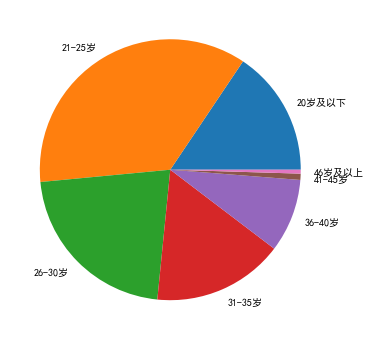

In [75]:
plt.figure(figsize = (6,6))
plt.pie(age_rg['占比'],labels=age_rg['age_range'])

### 小结：
- 21-25岁（90后）占比最大，为35.91%，其次是26-30岁（85后）21.91%，两者相加的人数已经超过半数了。
- 41岁以上的人(75前）只占总人数的1.25%。

## 3.地区/省份/城市TOP10分布

### 3.1地区用户分布

In [76]:
# 查看地区唯一值
df['d_name'].unique()

array(['华中地区', '华南地区', '西南地区', '华东地区', '华北地区', '西北地区', '东北地区'],
      dtype=object)

In [77]:
# 按照地区分组排序
area = df.groupby('d_name')['user_no'].count().sort_values(ascending = False)
area

d_name
华东地区    3211
华北地区    2859
华中地区     918
华南地区     834
西南地区     801
东北地区     747
西北地区     707
Name: user_no, dtype: int64

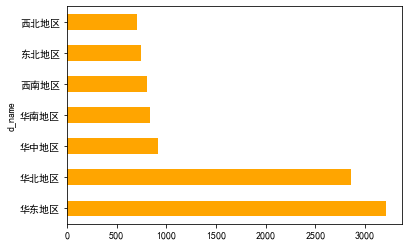

In [86]:
area.plot(kind ='barh',color = 'orange')

### 3.2省份用户分布

In [81]:
# 按省份分组排序
pro = df.groupby('p_name')['user_no'].count().sort_values(ascending = False)
# 取TOP10
pro_top10 = pro.iloc[0:10]
pro_top10

p_name
上海市    1526
北京市    1526
河北省     543
山西省     473
广东省     460
四川省     396
河南省     368
山东省     365
安徽省     352
辽宁省     308
Name: user_no, dtype: int64

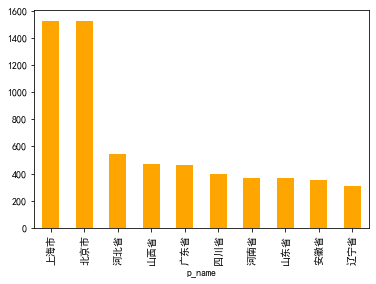

In [82]:
pro_top10.plot(kind = 'bar',color = 'orange')

### 3.3城市用户分布

In [83]:
# 按照城市分组排序
city = df.groupby('c_name')['user_no'].count().sort_values(ascending = False)
# 取TOP10
city_top10 = city.iloc[0:10]
city_top10

c_name
北京市     1526
上海市     1526
唐山市       57
承德市       57
石家庄市      57
张家口市      57
秦皇岛市      57
赤峰市       43
邢台市       43
邯郸市       43
Name: user_no, dtype: int64

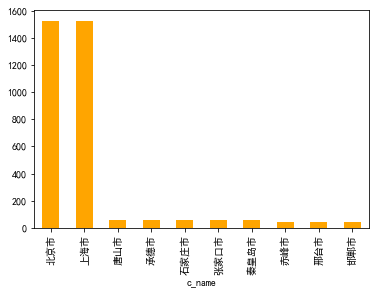

In [85]:
city_top10.plot(kind = 'bar',color = 'orange')

### 小结：
- 从地区角度来看，华东和华北地区的用户至少是其他地区用户的3倍。
- 从省份/直辖市角度来看，北京（属于华北地区）和上海（属于华东地区）的用户也至少是其他省份/直辖市用户的3倍。
- 从城市角度来看，除北京上海外，其他城市的用户数最多只有57个，北京上海的用户最少是其26倍以上。
- 华东和华北地区的用户绝大部分是由北京和上海的用户组成。

# 二、用户购买手机偏好(TGI)分析
- 不同性别对手机品牌的偏好TOP10
- 不同年龄段对手机品牌的偏好TOP10
- 不同地区对手机品牌的偏好TOP10
- 不同城市级别对手机品牌的偏好TOP10

In [88]:
# 查看一下数据
df.head()

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁
1,1100003136,ykyyepWjtn,杨辉,28,2,17698948844,104001008,104,华中地区,104001,河南省,开封市,26-30岁
2,1100003137,SbrzsSCdqS,李素英,27,2,17639183776,104001009,104,华中地区,104001,河南省,洛阳市,26-30岁
3,1100003138,camjMsXmru,刘洁,25,2,17692971321,104001010,104,华中地区,104001,河南省,商丘市,21-25岁
4,1100003139,eOmyLrDOLL,吴美玲,24,2,17639758215,104001011,104,华中地区,104001,河南省,许昌市,21-25岁


In [89]:
# 把df表和order_detail表进行user_no连接
df2 = df.merge(order_detail,left_on='user_no',right_on='user_no',how = 'inner')
df2.head()

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_no,order_date,pid,amount,platform_no,payment_pattern_no
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁,20180301005380,2018-03-01 13:34:06,1465909954,3,13,11001
1,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁,20180301014563,2018-03-02 22:13:01,1426872135,3,20,11006
2,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁,20180301023149,2018-03-03 15:39:54,1073412383,5,20,11006
3,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁,20180301041888,2018-03-05 21:04:20,1101135,4,13,11007
4,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁,20180301047723,2018-03-05 03:59:13,1398847306,4,19,11004


In [90]:
# 再利用pid和product表连接
df3 = df2.merge(product,left_on='pid',right_on='pid',how = 'inner')
#显示所有列
pd.set_option('display.max_columns',None)
df3.head(2)

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_no,order_date,pid,amount,platform_no,payment_pattern_no,title,sell_point,price,cid,created,updated
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,华中地区,104001,河南省,三门峡市,21-25岁,20180301005380,2018-03-01 13:34:06,1465909954,3,13,11001,爱我（LOVME）682 移动/联通2G 老人手机 双卡双待 白色,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88.0,560,2015-03-08 21:32:31,2015-03-08 21:32:31
1,1100003142,jAyfmdTuND,张天虹,34,2,15623916933,104001014,104,华中地区,104001,河南省,漯河市,31-35岁,20180301543300,2018-04-24 17:57:12,1465909954,5,12,11005,爱我（LOVME）682 移动/联通2G 老人手机 双卡双待 白色,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88.0,560,2015-03-08 21:32:31,2015-03-08 21:32:31


In [91]:
# 查看是否有缺失值
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637907 entries, 0 to 637906
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_no             637907 non-null  int64         
 1   user_name           637907 non-null  object        
 2   name                637907 non-null  object        
 3   age                 637907 non-null  int64         
 4   sex                 637907 non-null  int64         
 5   phone_no            637907 non-null  int64         
 6   c_id                637907 non-null  int64         
 7   d_id                637907 non-null  int64         
 8   d_name              637907 non-null  object        
 9   p_id                637907 non-null  int64         
 10  p_name              637907 non-null  object        
 11  c_name              637907 non-null  object        
 12  age_range           637907 non-null  object        
 13  order_no            637907 no

In [101]:
df3.to_csv('D:/Mico/Jupyter/jd3c/jd3c_wash.csv')
# 导出excel进行title手机字段清洗快速，title字段只要手机品牌即可。

In [2]:
# dtype=str把所有字段变成str类型
df4 = pd.read_csv('jd3c_wash.csv',encoding='gbk',dtype=str)

# 显示所有列
pd.set_option('display.max_columns',None)
# 显示所有行
#pd.set_option('display.max_rows',None)
df4.head(2)

,Unnamed: 0,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_date,pid,amount,platform_no,payment_pattern_no,sell_point,price,cid,created,updated,title
0,0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,中南地区,104001,河南省,三门峡市,21-25岁,2018/3/1 13:34,1465909954,3,13,11001,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
1,1,1100003142,jAyfmdTuND,张天虹,34,2,15623916933,104001014,104,中南地区,104001,河南省,漯河市,31-35岁,2018/4/24 17:57,1465909954,5,12,11005,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME


In [3]:
# 删除第1列（多余列），因为该列在导出来的时候是索引列。
df4.drop(['Unnamed: 0'],axis = 1,inplace = True)
df4.head()

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_date,pid,amount,platform_no,payment_pattern_no,sell_point,price,cid,created,updated,title
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,中南地区,104001,河南省,三门峡市,21-25岁,2018/3/1 13:34,1465909954,3,13,11001,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
1,1100003142,jAyfmdTuND,张天虹,34,2,15623916933,104001014,104,中南地区,104001,河南省,漯河市,31-35岁,2018/4/24 17:57,1465909954,5,12,11005,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
2,1100003180,ZlegIXyrSI,赵晓敏,25,2,15627399239,104004010,104,华南地区,104004,广东省,惠州市,21-25岁,2018/4/18 19:20,1465909954,3,12,11008,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
3,1100003233,CTQMwQqVTZ,高田田,25,2,15616624767,105003001,105,西南地区,105003,云南省,昆明市,21-25岁,2018/3/14 4:43,1465909954,7,16,11006,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
4,1102132170,rDSrhyaAtz,侯建春,23,1,15817983796,104005007,104,华南地区,104005,广西壮族自治区,来宾市,21-25岁,2018/3/18 17:18,1465909954,8,16,11002,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME


In [4]:
df4.info()
# sell_point有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636081 entries, 0 to 636080
Data columns (total 24 columns):
user_no               636081 non-null object
user_name             636081 non-null object
name                  636081 non-null object
age                   636081 non-null object
sex                   636081 non-null object
phone_no              636081 non-null object
c_id                  636081 non-null object
d_id                  636081 non-null object
d_name                636081 non-null object
p_id                  636081 non-null object
p_name                636081 non-null object
c_name                636081 non-null object
age_range             636081 non-null object
order_date            636081 non-null object
pid                   636081 non-null object
amount                636081 non-null object
platform_no           636081 non-null object
payment_pattern_no    636081 non-null object
sell_point            607391 non-null object
price                 636081 non-n

In [5]:
# 查看sell_point字段的空值字段
df4[df4['sell_point'].isnull() == True]

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_date,pid,amount,platform_no,payment_pattern_no,sell_point,price,cid,created,updated,title
1296,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,中南地区,104001,河南省,三门峡市,21-25岁,2018/3/5 23:04,1459236500,5,18,11002,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1297,1100003138,camjMsXmru,刘洁,25,2,17692971321,104001010,104,中南地区,104001,河南省,商丘市,21-25岁,2018/4/28 19:09,1459236500,4,11,11005,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1298,1100003167,tseIYunSRY,王佳烁,24,2,15638259812,104003010,104,中南地区,104003,湖南省,邵阳市,21-25岁,2018/3/23 4:48,1459236500,3,11,11001,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1299,1100003212,FfVgkzIEQo,马晓晨,34,2,15665867734,105001004,105,西南地区,105001,四川省,绵阳市,31-35岁,2018/5/2 0:52,1459236500,8,13,11003,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1300,1105898100,LRihZtKtQH,张美璐,25,2,13925807440,103003007,103,华东地区,103003,安徽省,淮南市,21-25岁,2018/3/11 7:51,1459236500,3,15,11001,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1301,1113710220,ImxlGfFIBA,刘子聪,36,2,15887376756,107000002,107,华东地区,107002,上海市,上海市,36-40岁,2018/3/23 5:12,1459236500,3,20,11008,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1302,1118492740,pnnxXRYScv,张 晁,24,1,15856528836,101001001,101,华北地区,101001,河北省,石家庄市,21-25岁,2018/4/1 16:21,1459236500,3,19,11002,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1303,1119966020,XInpKJUwrQ,董胜南,22,2,15868488403,101002005,101,华北地区,101002,山西省,阳泉市,21-25岁,2018/3/19 2:24,1459236500,3,12,11004,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1304,1122059310,hBGaUMtHSc,徐 晗,33,1,15883522232,107000001,107,华北地区,107001,北京市,北京市,31-35岁,2018/3/28 20:09,1459236500,3,12,11008,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族
1305,1123415320,EdUKnEibjE,李嘉凤,33,2,15855226916,107000001,107,华北地区,107001,北京市,北京市,31-35岁,2018/3/22 10:55,1459236500,3,11,11002,NaN,1868,560,2015/3/8 21:29,2015/3/8 21:29,魅族


In [6]:
# 给sell_point字段的空值填充为空
df4['sell_point'].fillna('无',inplace = True)

In [7]:
df4.info()
# 补齐空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636081 entries, 0 to 636080
Data columns (total 24 columns):
user_no               636081 non-null object
user_name             636081 non-null object
name                  636081 non-null object
age                   636081 non-null object
sex                   636081 non-null object
phone_no              636081 non-null object
c_id                  636081 non-null object
d_id                  636081 non-null object
d_name                636081 non-null object
p_id                  636081 non-null object
p_name                636081 non-null object
c_name                636081 non-null object
age_range             636081 non-null object
order_date            636081 non-null object
pid                   636081 non-null object
amount                636081 non-null object
platform_no           636081 non-null object
payment_pattern_no    636081 non-null object
sell_point            636081 non-null object
price                 636081 non-n

In [8]:
# 查看手机品牌的唯一值
df4['title'].unique()

array(['LOVME', '比酷', '爱意通', '索尼', '优思', '魅族', 'LG', 'TCL', '长虹', '海尔',
       '三盟', '苹果', '易丰', '诺基亚', '金圣达', '乐目', '天时达', '美翼', '飞利浦', '东信欧蓓',
       '誉品', '福满多', 'SOSMART', '亿城', '果冻', '纽曼', '职业者', '易百年', '摩托罗拉',
       '大显', '立丰', 'HANMAC', '奥乐', '锋达通', '三星', '荣事达', '金立', '中兴', '华为',
       '奥克斯', '百合', '诺亚信', '酷显', '贝尔丰', '德赛', '小辣椒', '派对', '乐派', 'innos',
       'OPPO', '波导', '金国威', '展翼', '心迪', '联想', '福泰通', '途耐', '朗界', '酷派',
       '美富通', '威铂', 'VEB', '派信', '荣耀', 'JEASUNG', '帷幄', '首信', '康佳', '优豊',
       '百加', '脉腾', '友信达', '鑫派尔', '一加', 'E.XUN', '乐锐', '大唐', '传奇', '唐为',
       '欧奇', '小米', '微诺', '福中福', 'MANN', '为美', '阿尔卡特', 'vivo', '天语', 'HTC',
       'Hasee神舟', '大Q手机', '盛隆', '海信', '创维', '富尔美', '世纪天元', '赛博宇华', '奇云',
       '三巨网', '凯利通', '唯爱', '天玺', '锤子', '迪士尼', '斐讯', '科铭', 'E派', 'Q米',
       '夏朗', '恒宇丰', '翼鸣', '博瑞', '明基', '聆韵', '普莱达', '努比亚', '欧博信', 'IUNI',
       '朗格', '诚基', '中维恒泰', '卓普', 'SUGAR', '朵唯', '里奥', '三普', '万利达', 'new',
       '美菱', '信得乐', '酷美', '创客', '爱诺德', '同心', '尼彩', '广信'

#### 由于存在一个用户多次购买同一品牌手机，这里我们做一个去重的工作。
#### 当计算比如不同性别对手机偏好度的时候，不会因为同一用户的多次购买同一品牌手机而导致该品牌手机用户数偏大。

In [9]:
# 根据用户编号（唯一）和手机品牌进行去重，只要一行记录中这两个字段的数据重复即为重复行
df4[df4.duplicated(subset=['user_no','title'])]
df4

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_date,pid,amount,platform_no,payment_pattern_no,sell_point,price,cid,created,updated,title
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,中南地区,104001,河南省,三门峡市,21-25岁,2018/3/1 13:34,1465909954,3,13,11001,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
1,1100003142,jAyfmdTuND,张天虹,34,2,15623916933,104001014,104,中南地区,104001,河南省,漯河市,31-35岁,2018/4/24 17:57,1465909954,5,12,11005,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
2,1100003180,ZlegIXyrSI,赵晓敏,25,2,15627399239,104004010,104,华南地区,104004,广东省,惠州市,21-25岁,2018/4/18 19:20,1465909954,3,12,11008,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
3,1100003233,CTQMwQqVTZ,高田田,25,2,15616624767,105003001,105,西南地区,105003,云南省,昆明市,21-25岁,2018/3/14 4:43,1465909954,7,16,11006,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
4,1102132170,rDSrhyaAtz,侯建春,23,1,15817983796,104005007,104,华南地区,104005,广西壮族自治区,来宾市,21-25岁,2018/3/18 17:18,1465909954,8,16,11002,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
5,1107898720,FuULRhPGWj,王晓月,19,2,15826210644,106002002,106,西北地区,106002,甘肃省,嘉峪关市,20岁及以下,2018/3/13 6:42,1465909954,5,13,11006,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
6,1110510200,TSDayGVaGe,何晨,23,1,15892368462,107000002,107,华东地区,107002,上海市,上海市,21-25岁,2018/4/26 9:49,1465909954,4,19,11009,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
7,1113268600,DPgVCgFylo,段秀丽,37,2,15897764004,107000001,107,华北地区,107001,北京市,北京市,36-40岁,2018/4/13 17:09,1465909954,3,11,11007,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
8,1117393600,hYutbZjwWV,王若兵,34,2,15861951966,107000002,107,华东地区,107002,上海市,上海市,31-35岁,2018/3/11 3:51,1465909954,5,12,11002,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
9,1119638620,psyzvaaYLV,靳自霞,27,2,15839062176,101002002,101,华北地区,101002,山西省,大同市,26-30岁,2018/4/21 15:38,1465909954,4,13,11007,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME


In [10]:
# 去重
df4.drop_duplicates(subset=['user_no','title'],inplace = True)

In [11]:
# 查看是否还有重复值
df4[df4.duplicated(subset=['user_no','title'])]

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_date,pid,amount,platform_no,payment_pattern_no,sell_point,price,cid,created,updated,title


In [12]:
# 查看还有多少条记录
len(df4)

420602

## 1.不同性别对手机品牌的偏好TOP10

In [114]:
# 方法1
# gender_phone1 = df4.groupby(['sex','title'])['user_no'].count()
# gender_phone1
# gender_phone1.loc['1']

# 方法2 根据性别和手机品牌进行分组统计
gender_phone = df4.groupby(['sex','title'])['user_no'].count().reset_index()
gender_phone

,sex,title,user_no
0,1,21克,414
1,1,E.XUN,717
2,1,EMOTO,125
3,1,E人E本,75
4,1,E派,191
...,...,...,...
363,2,青橙,395
364,2,飞利浦,4034
365,2,首信,1898
366,2,魅族,3594


### 计算TGI：即Target Group Index（目标群体指数）
#### TGI指数= [目标群体中具有某一特征的群体所占比例/总体中具有相同特征的群体所占比例]*标准数100

举例：
目标群体中具有某一特征的群体所占比例：【喜欢21克品牌】的【男的】/【男的】
总体中具有相同特征的群体所占比例：【喜欢21克品牌的男+女人数】/ 【男+女总人数】
TGI:（【喜欢21克品牌】的【男的】/【男的】）/ 【喜欢21克品牌的人数】/ 【男+女人数】 * 100

In [115]:
# 重置索引，则sex就不会变成索引，就是一个dataframe，方便下一步两个df的merge合并。
# 若是不重置索引，则sex为索引，就是一个series
# 获取不同性别总人数
gender_sum= gender_phone.groupby(['sex'])['user_no'].sum().reset_index()
gender_sum.head()

,sex,user_no
0,1,117485
1,2,303117


In [116]:
# gender_phone与gender_sum进行连接
gender_phone = gender_phone.merge(gender_sum,left_on='sex',right_on='sex',how = 'left')
gender_phone.head()

,sex,title,user_no_x,user_no_y
0,1,21克,414,117485
1,1,E.XUN,717,117485
2,1,EMOTO,125,117485
3,1,E人E本,75,117485
4,1,E派,191,117485


In [117]:
# 重命名列名
gender_phone.rename(index = str,columns = {'user_no_x':'num','user_no_y':'gender_num'},inplace = True)
gender_phone.head()

,sex,title,num,gender_num
0,1,21克,414,117485
1,1,E.XUN,717,117485
2,1,EMOTO,125,117485
3,1,E人E本,75,117485
4,1,E派,191,117485


In [130]:
# 查看一下某一手机型号的数量和该型号的总数
gender_phone[gender_phone['title'] == '21克']

,sex,title,num,gender_num
0,1,21克,414,117485
184,2,21克,1019,303117


In [129]:
# 目标群体中具有某一特征的群体所占比例：【喜欢21克品牌】的【男的】/【男的】
a = (gender_phone['num']/gender_phone['gender_num'])
display(a.head())
display(len(a))

0    0.003524
1    0.006103
2    0.001064
3    0.000638
4    0.001626
dtype: float64

368

In [127]:
# 总体中具有相同特征的群体所占比例：【喜欢21克品牌的男+女人数】/ 【男+女总人数】
b = (gender_phone.groupby('title')['num'].sum() / sum(gender_phone['num'])).reset_index()
display(b.head())
display(len(b))

# TGI:（【喜欢21克品牌】的【男的】/【男的】）/ 【喜欢21克品牌的人数】/ 【男+女人数】 * 100
# 但是目前不能相除，因为a和b的记录数不一样

,title,num
0,21克,0.003407
1,E.XUN,0.006369
2,EMOTO,0.001125
3,E人E本,0.000594
4,E派,0.001759


184

In [200]:
sum(gender_phone['num_x'])

420602

In [131]:
# 把b与gender_phone进行合并
gender_phone = gender_phone.merge(b,left_on='title',right_on='title',how = 'left')
gender_phone.head()

,sex,title,num_x,gender_num,num_y
0,1,21克,414,117485,0.003407
1,1,E.XUN,717,117485,0.006369
2,1,EMOTO,125,117485,0.001125
3,1,E人E本,75,117485,0.000594
4,1,E派,191,117485,0.001759


In [132]:
# TGI:（【喜欢21克品牌】的【男的】/【男的】）/ 【喜欢21克品牌的人数】/ 【男+女人数】 * 100
gender_phone['TGI'] = ((gender_phone['num_x']/gender_phone['gender_num']) / gender_phone['num_y'])*100

In [133]:
gender_phone.head()

,sex,title,num_x,gender_num,num_y,TGI
0,1,21克,414,117485,0.003407,103.429176
1,1,E.XUN,717,117485,0.006369,95.815408
2,1,EMOTO,125,117485,0.001125,94.610162
3,1,E人E本,75,117485,0.000594,107.401456
4,1,E派,191,117485,0.001759,92.403955


### 1.1男性对手机品牌偏好TOP10

In [137]:
# 男性手机品牌偏好TGI降序排序
male_phone = gender_phone[gender_phone['sex'] == '1'].sort_values(by = 'TGI',axis = 0,ascending = False)
male_phone.head()

# 存在问题：
# TGI排名靠前的手机类型，总用户数有80多的，人数较少可能导致TGI偏高
# TGI指数能够显示偏好的强弱，但很容易让人忽略具体的样本量大小

,sex,title,num_x,gender_num,num_y,TGI
113,1,欧博信,257,117485,0.001902,115.009059
82,1,富可视,88,117485,0.000656,114.146474
23,1,innos,164,117485,0.001224,114.005428
129,1,盛隆,83,117485,0.000649,108.843966
26,1,一加,433,117485,0.003407,108.175925


In [142]:
# 用平均人数的值作为阈值，保留大于平均值的的手机类型
male_phone_top10 = male_phone[male_phone['num_x'] > male_phone['num_x'].mean()].head(10)
male_phone_top10

,sex,title,num_x,gender_num,num_y,TGI
93,1,微诺,983,117485,0.008074,103.627435
149,1,荣耀,991,117485,0.008157,103.405074
138,1,美翼,1495,117485,0.012306,103.403642
155,1,贝多芬,655,117485,0.005395,103.346486
171,1,金立,988,117485,0.008143,103.272640
116,1,比酷,1950,117485,0.016201,102.452225
130,1,福中福,1194,117485,0.009924,102.409629
33,1,世纪天元,1056,117485,0.008797,102.176520
105,1,易百年,881,117485,0.007342,102.138042
46,1,优思,1939,117485,0.016170,102.069020


### 1.2女性对手机品牌偏好TOP10

In [139]:
female_phone = gender_phone[gender_phone['sex'] == '2'].sort_values(by = 'TGI',axis = 0,ascending = False)
female_phone.head()

,sex,title,num_x,gender_num,num_y,TGI
362,2,阿尔卡特,574,303117,0.001788,105.914420
245,2,博阅,339,303117,0.001077,103.839487
283,2,摩奇,204,303117,0.000649,103.688015
251,2,唯爱,1524,303117,0.004862,103.407656
268,2,小伊,201,303117,0.000642,103.298338


In [143]:
female_phone_top10 = female_phone[female_phone['num_x'] > female_phone['num_x'].mean()].head(10)
female_phone_top10

,sex,title,num_x,gender_num,num_y,TGI
218,2,东信欧蓓,2470,303117,0.008017,101.641350
185,2,E.XUN,1962,303117,0.006369,101.621904
204,2,TCL,2833,303117,0.009199,101.603550
303,2,派信,1824,303117,0.005939,101.319594
209,2,vivo,2356,303117,0.007675,101.275128
301,2,波导,2770,303117,0.009042,101.068189
232,2,传奇,2328,303117,0.007606,100.978700
263,2,奥克斯,2320,303117,0.007587,100.883983
269,2,小米,1705,303117,0.005580,100.802739
306,2,海尔,3802,303117,0.012444,100.795103


Text(0.5, 1.0, '女性对手机品牌偏好TOP10')

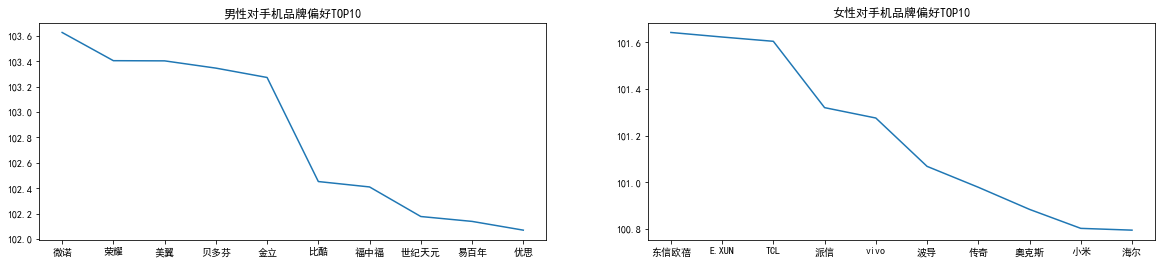

In [178]:
plt.figure(figsize = (20,4))
plt.subplot(121)
plt.plot(male_phone_top10['title'].values,male_phone_top10['TGI'].values)
plt.title('男性对手机品牌偏好TOP10')
plt.subplot(122)
plt.plot(female_phone_top10['title'].values,female_phone_top10['TGI'].values)
plt.title('女性对手机品牌偏好TOP10')

Text(0.5, 1.0, '手机品牌偏好TOP10女性用户数')

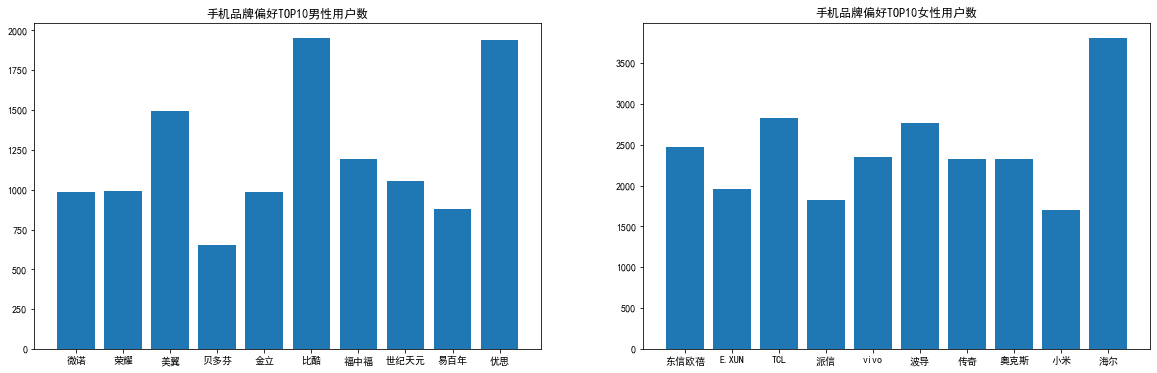

In [183]:
plt.figure(figsize = (20,6))
plt.subplot(121)
plt.bar(male_phone_top10['title'].values,male_phone_top10['num_x'].values)
plt.title('手机品牌偏好TOP10男性用户数')
plt.subplot(122)
plt.bar(female_phone_top10['title'].values,female_phone_top10['num_x'].values)
plt.title('手机品牌偏好TOP10女性用户数')

### 小结：
- 男性对微诺、荣耀、美翼品牌手机的偏好度较高；优思、比酷、美翼品牌手机用户数较多
- 女性对东信欧蓓、E.XUN、TCL品牌手机的偏好度较高；海尔、TCL、波导品牌手机用户数较多
- 偏好度高低与用户数多少不成正比

## 2.不同年龄段对手机品牌的偏好TOP10

比如：
目标群体中具有某一特征的群体所占比例：【喜欢X品牌手机】的【XX后】/【XX后】
总体中具有相同特征的群体所占比例：【喜欢X品牌的人数】/ 【总人数】
TGI:（【喜欢X品牌手机】的【95后】/【95后】）/ 【喜欢X品牌的人数】/ 【总人数】 * 100

In [184]:
# 根据年龄段和手机品牌进行分组统计
age_phone = df4.groupby(['age_range','title'])['user_no'].count().reset_index()
age_phone

,age_range,title,user_no
0,20岁及以下,21克,240
1,20岁及以下,E.XUN,441
2,20岁及以下,EMOTO,77
3,20岁及以下,E人E本,56
4,20岁及以下,E派,115
...,...,...,...
1270,46岁及以上,青橙,3
1271,46岁及以上,飞利浦,20
1272,46岁及以上,首信,10
1273,46岁及以上,魅族,24


In [185]:
# 各年龄段的总人数
age_sum = age_phone.groupby('age_range')['user_no'].sum().reset_index()
age_sum

,age_range,user_no
0,20岁及以下,65563
1,21-25岁,150662
2,26-30岁,92405
3,31-35岁,68512
4,36-40岁,38229
5,41-45岁,3218
6,46岁及以上,2013


In [186]:
# 验证各年龄段加起来的人数总和
age_sum['user_no'].sum()

420602

In [187]:
# 把age_sum和age_phone进行连接
age_phone = age_phone.merge(age_sum,left_on='age_range',right_on='age_range',how = 'left')
age_phone.head()

,age_range,title,user_no_x,user_no_y
0,20岁及以下,21克,240,65563
1,20岁及以下,E.XUN,441,65563
2,20岁及以下,EMOTO,77,65563
3,20岁及以下,E人E本,56,65563
4,20岁及以下,E派,115,65563


In [188]:
# 喜欢不同手机品牌的人数
phone_num = age_phone.groupby('title')['user_no_x'].sum().reset_index()
phone_num.head()

,title,user_no_x
0,21克,1433
1,E.XUN,2679
2,EMOTO,473
3,E人E本,250
4,E派,740


In [189]:
# 把phone_num和age_phone进行连接
age_phone = age_phone.merge(phone_num,left_on='title',right_on='title',how = 'left')
age_phone.head()

,age_range,title,user_no_x_x,user_no_y,user_no_x_y
0,20岁及以下,21克,240,65563,1433
1,20岁及以下,E.XUN,441,65563,2679
2,20岁及以下,EMOTO,77,65563,473
3,20岁及以下,E人E本,56,65563,250
4,20岁及以下,E派,115,65563,740


In [190]:
# 修改字段名
age_phone.rename(index = str,columns={'user_no_x_x':'num','user_no_y':'age_num','user_no_x_y':'phone_num'},inplace = True)
age_phone.head()

,age_range,title,num,age_num,phone_num
0,20岁及以下,21克,240,65563,1433
1,20岁及以下,E.XUN,441,65563,2679
2,20岁及以下,EMOTO,77,65563,473
3,20岁及以下,E人E本,56,65563,250
4,20岁及以下,E派,115,65563,740


In [193]:
# TGI:（【喜欢XX手机】的【XX后】/【XX后】）/ 【喜欢XX手机的人数】/ 【总人数】 * 100
age_phone['TGI'] = (age_phone['num']/age_phone['age_num'])/(age_phone['phone_num']/age_phone['num'].sum())*100
age_phone.head()

,age_range,title,num,age_num,phone_num,TGI
0,20岁及以下,21克,240,65563,1433,107.442862
1,20岁及以下,E.XUN,441,65563,2679,105.603519
2,20岁及以下,EMOTO,77,65563,473,104.434045
3,20岁及以下,E人E本,56,65563,250,143.701246
4,20岁及以下,E派,115,65563,740,99.696207


### 2.1 20岁及以下(95后)对手机品牌的偏好TOP10

In [194]:
# 95后的TGI倒序排序
age_phone_TIG95 = age_phone[age_phone['age_range'] == '20岁及以下'].sort_values(by = 'TGI',axis = 0,ascending = False)
age_phone_TIG95.head()

,age_range,title,num,age_num,phone_num,TGI
3,20岁及以下,E人E本,56,65563,250,143.701246
118,20岁及以下,洪洋伟业,100,65563,503,127.539447
150,20岁及以下,詹姆士,49,65563,256,122.791592
173,20岁及以下,钛客,48,65563,251,122.681770
72,20岁及以下,大成,94,65563,501,120.365672


In [228]:
# TGI高，但是人数比较少，会导致TGI偏高，所以我们要筛选人数大于平均人数的TGI排名
age95_phone_top10 = age_phone_TIG95[age_phone_TIG95['num'] > age_phone_TIG95['num'].mean()].head(10)
age95_phone_top10

,age_range,title,num,age_num,phone_num,TGI
155,20岁及以下,贝多芬,387,65563,2269,109.418054
97,20岁及以下,恒宇丰,363,65563,2151,108.262669
171,20岁及以下,金立,565,65563,3425,105.827951
136,20岁及以下,纽曼,565,65563,3426,105.797061
1,20岁及以下,E.XUN,441,65563,2679,105.603519
85,20岁及以下,小米,386,65563,2347,105.508326
25,20岁及以下,vivo,529,65563,3228,105.131936
34,20岁及以下,东信欧蓓,547,65563,3372,104.066818
20,20岁及以下,TCL,627,65563,3869,103.963604
156,20岁及以下,贝尔丰,446,65563,2784,102.772789


### 2.2 21-25岁(90后)对手机品牌的偏好TOP10

In [197]:
# 90后的TGI倒序排序
age_phone_TIG90 = age_phone[age_phone['age_range'] == '21-25岁'].sort_values(by = 'TGI',axis = 0,ascending = False)
age_phone_TIG90.head()

,age_range,title,num,age_num,phone_num,TGI
283,21-25岁,摩奇,119,150662,273,121.689167
359,21-25岁,锐铂X3,107,150662,262,114.011876
259,21-25岁,天玺,99,150662,245,112.807173
186,21-25岁,EMOTO,190,150662,473,112.139874
206,21-25岁,ZHANe,99,150662,253,109.240148


In [229]:
# TGI高，但是人数比较少，会导致TGI偏高，所以我们要筛选人数大于平均人数的TGI排名
age90_phone_top10 = age_phone_TIG90[age_phone_TIG90['num'] > age_phone_TIG90['num'].mean()].head(10)
age90_phone_top10

,age_range,title,num,age_num,phone_num,TGI
365,21-25岁,首信,1004,150662,2651,105.728383
303,21-25岁,派信,944,150662,2498,105.498714
265,21-25岁,威铂,1356,150662,3630,104.284718
232,21-25岁,传奇,1190,150662,3199,103.848524
361,21-25岁,长虹,1599,150662,4301,103.787876
276,21-25岁,康佳,1750,150662,4733,103.221258
323,21-25岁,美菱,1055,150662,2864,102.836444
307,21-25岁,爱意通,1779,150662,4867,102.042762
219,21-25岁,中兴,1932,150662,5289,101.976748
300,21-25岁,比酷,2489,150662,6814,101.974215


### 2.3 26-30岁(85后)对手机品牌的偏好TOP10

In [203]:
# 85后的TGI倒序排序
age_phone_TIG85 = age_phone[age_phone['age_range'] == '26-30岁'].sort_values(by = 'TGI',axis = 0,ascending = False)
age_phone_TIG85.head()

,age_range,title,num,age_num,phone_num,TGI
505,26-30岁,美富通,77,92405,281,124.726940
518,26-30岁,詹姆士,65,92405,256,115.571102
497,26-30岁,盛隆,68,92405,273,113.376260
452,26-30岁,小伊,67,92405,270,112.950173
423,26-30岁,努比亚,192,92405,777,112.475018


In [230]:
# TGI高，但是人数比较少，会导致TGI偏高，所以我们要筛选人数大于平均人数的TGI排名
age85_phone_top10 = age_phone_TIG85[age_phone_TIG85['num'] > age_phone_TIG85['num'].mean()].head(10)
age85_phone_top10

,age_range,title,num,age_num,phone_num,TGI
401,26-30岁,世纪天元,846,92405,3700,104.074540
374,26-30岁,HTC,1026,92405,4488,104.056778
369,26-30岁,E.XUN,611,92405,2679,103.811235
444,26-30岁,天语,603,92405,2654,103.417076
534,26-30岁,金国威,708,92405,3122,103.222939
550,26-30岁,魅族,1127,92405,4999,102.616369
461,26-30岁,微诺,765,92405,3396,102.534405
503,26-30岁,索尼,811,92405,3601,102.511738
400,26-30岁,三盟,1825,92405,8105,102.490996
498,26-30岁,福中福,939,92405,4174,102.397419


### 2.4 31-35岁(80后)对手机品牌的偏好TOP10

In [231]:
# 80后的TGI倒序排序
age_phone_TIG80 = age_phone[age_phone['age_range'] == '31-35岁'].sort_values(by = 'TGI',axis = 0,ascending = False)
age80_phone_top10 = age_phone_TIG80[age_phone_TIG80['num'] > age_phone_TIG80['num'].mean()].head(10)
age80_phone_top10

,age_range,title,num,age_num,phone_num,TGI
567,31-35岁,OPPO,952,68512,5529,105.704882
557,31-35岁,HANMAC,708,68512,4122,105.445963
682,31-35岁,福中福,711,68512,4174,104.573548
645,31-35岁,微诺,577,68512,3396,104.306847
577,31-35岁,vivo,548,68512,3228,104.220156
701,31-35岁,荣耀,579,68512,3431,103.600663
690,31-35岁,美翼,872,68512,5176,103.425328
564,31-35岁,LOVME,586,68512,3494,102.962577
706,31-35岁,诺基亚,1099,68512,6563,102.801624
637,31-35岁,小米,393,68512,2347,102.797878


### 2.5 36-40岁(75后)对手机品牌的偏好TOP10

In [232]:
# 75后的TGI倒序排序
age_phone_TIG75 = age_phone[age_phone['age_range'] == '36-40岁'].sort_values(by = 'TGI',axis = 0,ascending = False)
age75_phone_top10 = age_phone_TIG75[age_phone_TIG75['num'] > age_phone_TIG75['num'].mean()].head(10)
age75_phone_top10

,age_range,title,num,age_num,phone_num,TGI
748,36-40岁,LOVME,344,38229,3494,108.321318
784,36-40岁,传奇,310,38229,3199,106.616851
902,36-40岁,金国威,302,38229,3122,106.427152
850,36-40岁,欧奇,345,38229,3569,106.353293
917,36-40岁,首信,255,38229,2651,105.830013
918,36-40岁,魅族,479,38229,4999,105.421884
891,36-40岁,贝多芬,216,38229,2269,104.736402
802,36-40岁,唐为,351,38229,3691,104.626444
755,36-40岁,SUGAR,295,38229,3103,104.596857
885,36-40岁,荣耀,326,38229,3431,104.538263


### 2.6 41-45岁(70后)对手机品牌的偏好TOP10

In [233]:
# 70后的TGI倒序排序
age_phone_TIG70 = age_phone[age_phone['age_range'] == '41-45岁'].sort_values(by = 'TGI',axis = 0,ascending = False)
age70_phone_top10 = age_phone_TIG70[age_phone_TIG70['num'] > age_phone_TIG70['num'].mean()].head(10)
age70_phone_top10

,age_range,title,num,age_num,phone_num,TGI
956,41-45岁,中维恒泰,19,3218,1648,150.689047
998,41-45岁,奥克斯,35,3218,3191,143.359519
1059,41-45岁,聆韵,21,3218,2029,135.276557
1038,41-45岁,派对,20,3218,1970,132.693321
990,41-45岁,大Q手机,20,3218,2017,129.601310
1040,41-45岁,海尔,51,3218,5234,127.356687
1053,41-45岁,索尼,34,3218,3601,123.407368
1097,41-45岁,魅族,47,3218,4999,122.885323
1087,41-45岁,金立,32,3218,3425,122.116598
957,41-45岁,丰讯达,19,3218,2073,119.795248


### 2.7 46岁及以上(70钱)对手机品牌的偏好TOP10

In [234]:
# 70前的TGI倒序排序
age_phone_TIG70before = age_phone[age_phone['age_range'] == '46岁及以上'].sort_values(by = 'TGI',axis = 0,ascending = False)
age70before_phone_top10 = age_phone_TIG70before[age_phone_TIG70before['num'] > age_phone_TIG70before['num'].mean()].head(10)
age70before_phone_top10

,age_range,title,num,age_num,phone_num,TGI
1117,46岁及以上,SOSMART,20,2013,2663,156.922923
1250,46岁及以上,迪士尼,14,2013,1910,153.151843
1152,46岁及以上,创维,14,2013,2020,144.811891
1234,46岁及以上,聆韵,14,2013,2029,144.169551
1202,46岁及以上,朗格,14,2013,2071,141.245785
1113,46岁及以上,NUU,13,2013,2030,133.805780
1110,46岁及以上,LG,20,2013,3129,133.552490
1135,46岁及以上,丰讯达,13,2013,2073,131.030262
1139,46岁及以上,乐目,35,2013,5785,126.413146
1192,46岁及以上,恒宇丰,13,2013,2151,126.278816


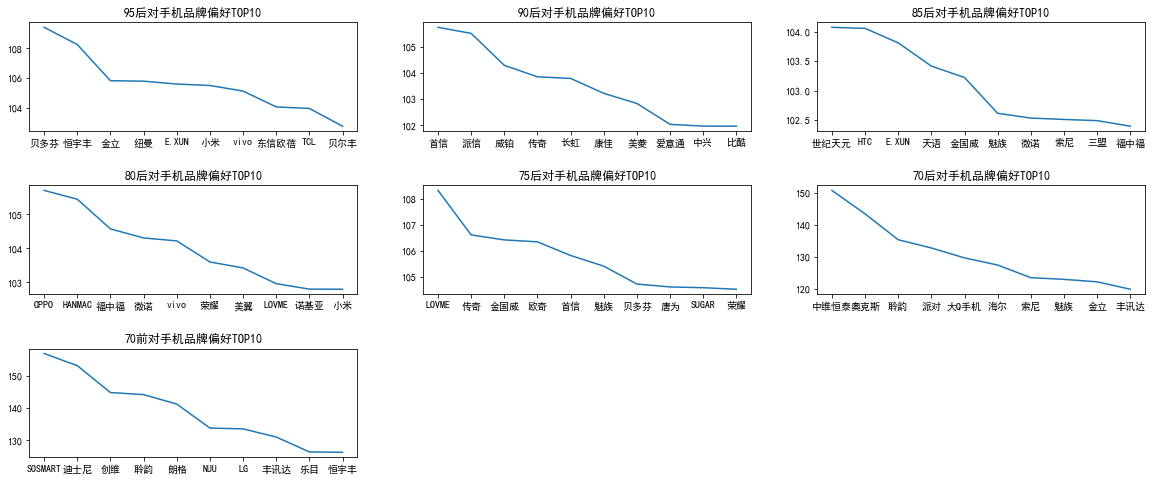

In [235]:
plt.figure(figsize = (20,8))
plt.subplot(331)
plt.plot(age95_phone_top10['title'].values,age95_phone_top10['TGI'].values)
plt.title('95后对手机品牌偏好TOP10')
plt.subplot(332)
plt.plot(age90_phone_top10['title'].values,age90_phone_top10['TGI'].values)
plt.title('90后对手机品牌偏好TOP10')
plt.subplot(333)
plt.plot(age85_phone_top10['title'].values,age85_phone_top10['TGI'].values)
plt.title('85后对手机品牌偏好TOP10')
plt.subplot(334)
plt.plot(age80_phone_top10['title'].values,age80_phone_top10['TGI'].values)
plt.title('80后对手机品牌偏好TOP10')
plt.subplot(335)
plt.plot(age75_phone_top10['title'].values,age75_phone_top10['TGI'].values)
plt.title('75后对手机品牌偏好TOP10')
plt.subplot(336)
plt.plot(age70_phone_top10['title'].values,age70_phone_top10['TGI'].values)
plt.title('70后对手机品牌偏好TOP10')
plt.subplot(337)
plt.plot(age70before_phone_top10['title'].values,age70before_phone_top10['TGI'].values)
plt.title('70前对手机品牌偏好TOP10')

plt.subplots_adjust(hspace=0.5) # hspace是设置子绘图区域高度间隔，wspace是设置宽度间隔

### 小结：
- 95后对'贝多芬', '恒宇丰', '金立'品牌手机的偏好度较高；
- 90后对'首信', '派信', '威铂'品牌手机的偏好度较高；
- 85后对'世纪天元', 'HTC', 'E.XUN'品牌手机的偏好度较高；
- 80后对'OPPO', 'HANMAC', '福中福'品牌手机的偏好度较高；
- 75后对'LOVME', '传奇', '金国威'品牌手机的偏好度较高；
- 70后对'中维恒泰', '奥克斯', '聆韵'品牌手机的偏好度较高；
- 70前对'SOSMART', '迪士尼', '创维'品牌手机的偏好度较高；
- 偏好度高低与用户数多少不成正比。

## 3.不同地区对手机品牌的偏好TOP10

比如： 
目标群体中具有某一特征的群体所占比例：【喜欢X品牌手机】的【A地区人数】/【A地区人数】 
总体中具有相同特征的群体所占比例：【喜欢X品牌的人数】/ 【总人数】 
TGI:（【喜欢X品牌手机】的【A地区人数】/【A地区人数】）/ 【喜欢X品牌的人数】/ 【总人数】 * 100

In [14]:
# 根据地区和手机品牌进行分组统计
area_phone = df4.groupby(['d_name','title'])['user_no'].count().reset_index()
area_phone

,d_name,title,user_no
0,东北地区,21克,111
1,东北地区,E.XUN,192
2,东北地区,EMOTO,32
3,东北地区,E人E本,29
4,东北地区,E派,65
5,东北地区,HANMAC,324
6,东北地区,HTC,354
7,东北地区,Hasee神舟,123
8,东北地区,HelloCom,82
9,东北地区,IUNI,48


In [15]:
# 各地区总人数
area_sum = area_phone.groupby('d_name')['user_no'].sum().reset_index()
area_sum

,d_name,user_no
0,东北地区,31353
1,中南地区,38165
2,华东地区,134152
3,华北地区,119037
4,华南地区,34915
5,西北地区,29367
6,西南地区,33613


In [18]:
# 把area_sum和area_phone进行连接
area_phone = area_phone.merge(area_sum,left_on='d_name',right_on='d_name',how = 'left')
area_phone.head()

,d_name,title,user_no_x,user_no_y
0,东北地区,21克,111,31353
1,东北地区,E.XUN,192,31353
2,东北地区,EMOTO,32,31353
3,东北地区,E人E本,29,31353
4,东北地区,E派,65,31353


In [19]:
# 喜欢X手机品牌的人数
phone_num = area_phone.groupby('title')['user_no_x'].sum().reset_index()
phone_num.head()

,title,user_no_x
0,21克,1433
1,E.XUN,2679
2,EMOTO,473
3,E人E本,250
4,E派,740


In [20]:
# 把phone_num和area_phone进行连接
area_phone = area_phone.merge(phone_num,left_on='title',right_on='title',how = 'left')
area_phone.head()

,d_name,title,user_no_x_x,user_no_y,user_no_x_y
0,东北地区,21克,111,31353,1433
1,东北地区,E.XUN,192,31353,2679
2,东北地区,EMOTO,32,31353,473
3,东北地区,E人E本,29,31353,250
4,东北地区,E派,65,31353,740


In [21]:
# 修改字段名
area_phone.rename(index = str,columns={'user_no_x_x':'num','user_no_y':'area_num','user_no_x_y':'phone_num'},inplace = True)
area_phone.head()

,d_name,title,num,area_num,phone_num
0,东北地区,21克,111,31353,1433
1,东北地区,E.XUN,192,31353,2679
2,东北地区,EMOTO,32,31353,473
3,东北地区,E人E本,29,31353,250
4,东北地区,E派,65,31353,740


In [23]:
# TGI:（【喜欢X品牌手机】的【A地区人数】/【A地区人数】）/ 【喜欢X品牌的人数】/ 【总人数】 * 100
area_phone['TGI'] = (area_phone['num']/area_phone['area_num'])/(area_phone['phone_num']/area_phone['num'].sum())*100
area_phone.head()

,d_name,title,num,area_num,phone_num,TGI
0,东北地区,21克,111,31353,1433,103.912793
1,东北地区,E.XUN,192,31353,2679,96.143681
2,东北地区,EMOTO,32,31353,473,90.757196
3,东北地区,E人E本,29,31353,250,155.614557
4,东北地区,E派,65,31353,740,117.834881


### 3.1 东北地区对手机品牌的偏好TOP10

In [25]:
# 东北地区的TGI倒序排序
area_phone_en = area_phone[area_phone['d_name'] == '东北地区'].sort_values(by = 'TGI',axis = 0,ascending = False)
area_phone_entop10 = area_phone_en[area_phone_en['num'] > area_phone_en['num'].mean()].head(10)
area_phone_entop10

,d_name,title,num,area_num,phone_num,TGI
66,东北地区,唐为,315,31353,3691,114.487676
181,东北地区,首信,224,31353,2651,113.352348
166,东北地区,金国威,259,31353,3122,111.290757
25,东北地区,vivo,264,31353,3228,109.714147
76,东北地区,天语,216,31353,2654,109.180496
100,东北地区,摩托罗拉,172,31353,2118,108.941844
155,东北地区,贝多芬,184,31353,2269,108.786639
12,东北地区,LOVME,283,31353,3494,108.656514
35,东北地区,中兴,422,31353,5289,107.036307
151,东北地区,誉品,333,31353,4191,106.590575


### 3.2 中南地区对手机品牌的偏好TOP10

In [27]:
# 中南地区的TGI倒序排序
area_phone_ms = area_phone[area_phone['d_name'] == '中南地区'].sort_values(by = 'TGI',axis = 0,ascending = False)
area_phone_mstop10 = area_phone_ms[area_phone_ms['num'] > area_phone_ms['num'].mean()].head(10)
area_phone_mstop10

,d_name,title,num,area_num,phone_num,TGI
198,中南地区,NUU,209,38165,2030,113.463536
355,中南地区,金立,338,38165,3425,108.758245
202,中南地区,SOSMART,262,38165,2663,108.426688
203,中南地区,SUGAR,301,38165,3103,106.903220
320,中南地区,纽曼,329,38165,3426,105.831416
250,中南地区,唐为,352,38165,3691,105.100477
262,中南地区,奥乐,349,38165,3667,104.886739
277,中南地区,微诺,322,38165,3396,104.494698
365,中南地区,首信,251,38165,2651,104.344620
298,中南地区,欧奇,337,38165,3569,104.061341


### 3.3 华东地区对手机品牌的偏好TOP10

In [29]:
# 华东地区的TGI倒序排序
area_phone_e = area_phone[area_phone['d_name'] == '华东地区'].sort_values(by = 'TGI',axis = 0,ascending = False)
area_phone_etop10 = area_phone_e[area_phone_e['num'] > area_phone_e['num'].mean()].head(10)
area_phone_etop10

,d_name,title,num,area_num,phone_num,TGI
498,华东地区,福中福,1377,134152,4174,103.432180
482,华东地区,欧奇,1175,134152,3569,103.220391
535,华东地区,金圣达,1730,134152,5273,102.863788
516,华东地区,荣事达,828,134152,2527,102.730470
507,华东地区,美菱,936,134152,2864,102.465347
484,华东地区,比酷,2225,134152,6814,102.376922
490,华东地区,海尔,1704,134152,5234,102.072806
437,华东地区,夏朗,934,134152,2874,101.890641
503,华东地区,索尼,1169,134152,3601,101.780732
464,华东地区,心迪,1966,134152,6061,101.698234


### 3.4 华北地区对手机品牌的偏好TOP10

In [30]:
# 华北地区的TGI倒序排序
area_phone_n = area_phone[area_phone['d_name'] == '华北地区'].sort_values(by = 'TGI',axis = 0,ascending = False)
area_phone_ntop10 = area_phone_n[area_phone_n['num'] > area_phone_n['num'].mean()].head(10)
area_phone_ntop10

,d_name,title,num,area_num,phone_num,TGI
637,华北地区,小米,690,119037,2347,103.878426
553,华北地区,E.XUN,784,119037,2679,103.402898
703,华北地区,誉品,1222,119037,4191,103.025067
571,华北地区,SUGAR,901,119037,3103,102.596460
669,华北地区,波导,1104,119037,3803,102.572776
671,华北地区,派信,725,119037,2498,102.549827
614,华北地区,友信达,1622,119037,5589,102.543019
656,华北地区,易丰,1801,119037,6209,102.489981
612,华北地区,博瑞,832,119037,2885,101.898284
596,华北地区,亿城,1227,119037,4255,101.890656


### 3.5 华南地区对手机品牌的偏好TOP10

In [31]:
# 华南地区的TGI倒序排序
area_phone_s = area_phone[area_phone['d_name'] == '华南地区'].sort_values(by = 'TGI',axis = 0,ascending = False)
area_phone_stop10 = area_phone_s[area_phone_s['num'] > area_phone_s['num'].mean()].head(10)
area_phone_stop10

,d_name,title,num,area_num,phone_num,TGI
770,华南地区,东信欧蓓,318,34915,3372,113.605365
784,华南地区,传奇,289,34915,3199,108.828562
812,华南地区,天语,234,34915,2654,106.212156
871,华南地区,索尼,316,34915,3601,105.711747
747,华南地区,LG,271,34915,3129,104.333317
858,华南地区,海尔,452,34915,5234,104.031295
821,华南地区,小米,202,34915,2347,103.680616
902,华南地区,金国威,267,34915,3122,103.023820
891,华南地区,贝多芬,194,34915,2269,102.997462
892,华南地区,贝尔丰,238,34915,2784,102.983350


### 3.6 西北地区对手机品牌的偏好TOP10

In [32]:
# 西北地区的TGI倒序排序
area_phone_wn = area_phone[area_phone['d_name'] == '西北地区'].sort_values(by = 'TGI',axis = 0,ascending = False)
area_phone_wntop10 = area_phone_wn[area_phone_wn['num'] > area_phone_wn['num'].mean()].head(10)
area_phone_wntop10

,d_name,title,num,area_num,phone_num,TGI
957,西北地区,丰讯达,172,29367,2073,118.834049
1017,西北地区,恒宇丰,171,29367,2151,113.859022
1076,西北地区,贝尔丰,218,29367,2784,112.149932
999,西北地区,奥克斯,245,29367,3191,109.964127
1043,西北地区,爱意通,368,29367,4867,108.292461
932,西北地区,LOVME,264,29367,3494,108.216324
968,西北地区,传奇,237,29367,3199,106.107445
925,西北地区,HANMAC,304,29367,4122,105.627584
1100,西北地区,飞利浦,412,29367,5598,105.408607
980,西北地区,博瑞,212,29367,2885,105.245078


### 3.7 西南地区对手机品牌的偏好TOP10

In [33]:
# 西南地区的TGI倒序排序
area_phone_ws = area_phone[area_phone['d_name'] == '西南地区'].sort_values(by = 'TGI',axis = 0,ascending = False)
area_phone_wstop10 = area_phone_ws[area_phone_ws['num'] > area_phone_ws['num'].mean()].head(10)
area_phone_wstop10

,d_name,title,num,area_num,phone_num,TGI
1180,西南地区,天语,248,33613,2654,116.927004
1209,西南地区,易百年,268,33613,3088,108.597933
1185,西南地区,威铂,315,33613,3630,108.584538
1252,西南地区,荣事达,219,33613,2527,108.443351
1286,西南地区,魅族,426,33613,4999,106.632728
1243,西南地区,美菱,239,33613,2864,104.421264
1182,西南地区,奥乐,306,33613,3667,104.417809
1196,西南地区,康佳,394,33613,4733,104.165469
1284,西南地区,飞利浦,466,33613,5598,104.163864
1240,西南地区,纽曼,285,33613,3426,104.093008


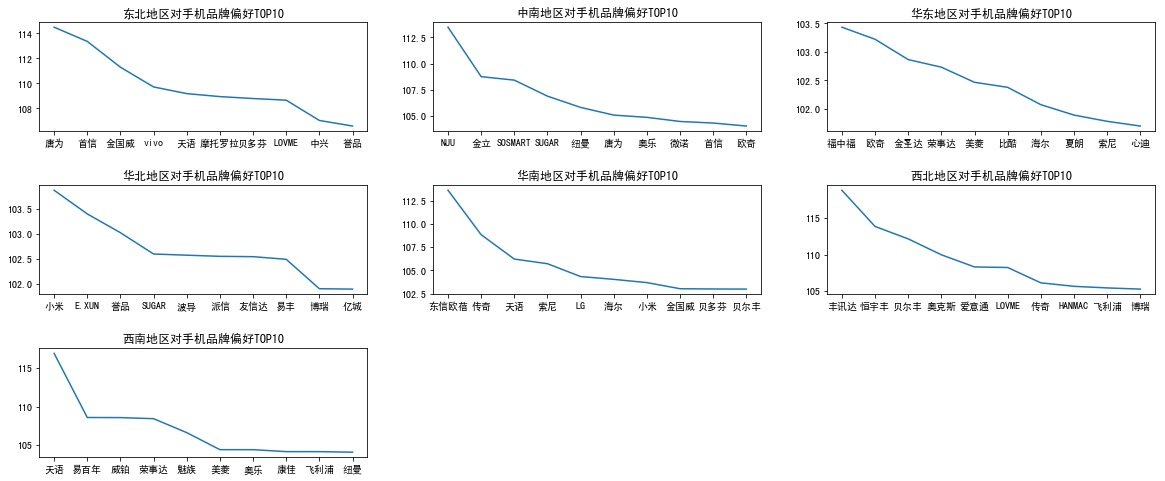

In [34]:
plt.figure(figsize = (20,8))
plt.subplot(331)
plt.plot(area_phone_entop10['title'].values,area_phone_entop10['TGI'].values)
plt.title('东北地区对手机品牌偏好TOP10')
plt.subplot(332)
plt.plot(area_phone_mstop10['title'].values,area_phone_mstop10['TGI'].values)
plt.title('中南地区对手机品牌偏好TOP10')
plt.subplot(333)
plt.plot(area_phone_etop10['title'].values,area_phone_etop10['TGI'].values)
plt.title('华东地区对手机品牌偏好TOP10')
plt.subplot(334)
plt.plot(area_phone_ntop10['title'].values,area_phone_ntop10['TGI'].values)
plt.title('华北地区对手机品牌偏好TOP10')
plt.subplot(335)
plt.plot(area_phone_stop10['title'].values,area_phone_stop10['TGI'].values)
plt.title('华南地区对手机品牌偏好TOP10')
plt.subplot(336)
plt.plot(area_phone_wntop10['title'].values,area_phone_wntop10['TGI'].values)
plt.title('西北地区对手机品牌偏好TOP10')
plt.subplot(337)
plt.plot(area_phone_wstop10['title'].values,area_phone_wstop10['TGI'].values)
plt.title('西南地区对手机品牌偏好TOP10')

plt.subplots_adjust(hspace=0.5) # hspace是设置子绘图区域高度间隔，wspace是设置宽度间隔

### 小结：
- 东北地区对'唐为', '首信', '金国威'品牌手机的偏好度较高；
- 中南地区对'NUU', '金立', 'SOSMART'品牌手机的偏好度较高；
- 华东地区对'福中福', '欧奇', '金圣达'品牌手机的偏好度较高；
- 华北地区对'小米', 'E.XUN', '誉品'品牌手机的偏好度较高；
- 华南地区对'东信欧蓓', '传奇', '天语'品牌手机的偏好度较高；
- 西北地区对'丰讯达', '恒宇丰', '贝尔丰'品牌手机的偏好度较高；
- 西南地区对'天语', '易百年', '威铂'品牌手机的偏好度较高；
- 偏好度高低与用户数多少不成正比。

## 4.不同城市级别对手机品牌的偏好TOP10

比如： 
目标群体中具有某一特征的群体所占比例：【喜欢X品牌手机】的【A城市级别人数】/【A城市级别人数】 
总体中具有相同特征的群体所占比例：【喜欢X品牌的人数】/ 【总人数】 
TGI:（【喜欢X品牌手机】的【A城市级别人数】/【A城市级别人数】）/ 【喜欢X品牌的人数】/ 【总人数】 * 100

In [13]:
# 根据城市和手机品牌进行分组统计
city_phone = df4.groupby(['c_name','title'])['user_no'].count().reset_index()
city_phone

,c_name,title,user_no
0,七台河市,21克,6
1,七台河市,E.XUN,5
2,七台河市,EMOTO,2
3,七台河市,E人E本,1
4,七台河市,E派,4
5,七台河市,HANMAC,11
6,七台河市,HTC,10
7,七台河市,Hasee神舟,3
8,七台河市,HelloCom,4
9,七台河市,IUNI,3


In [14]:
# 根据城市划分城市级别
lst = []
for i in range(len(city_phone)):
    if city_phone['c_name'][i] in ('北京市','上海市','广州市','深圳市'):
        lst.append('一线城市')
    elif city_phone['c_name'][i] in ('成都市','杭州市','重庆市','武汉市','西安市','苏州市','天津市','南京市','长沙市','郑州市','东莞市','青岛市','沈阳市','宁波市','昆明市'):
        lst.append('新一线城市')
    elif city_phone['c_name'][i] in ('无锡市','佛山市','合肥市','大连市','福州市','厦门市','哈尔滨市','济南市','温州市','南宁市','长春市','泉州市','石家庄市','贵阳市','南昌市','金华市','常州市','南通市','嘉兴市','太原市','徐州市','惠州市','珠海市','中山市','台州市','烟台市','兰州市','绍兴市','海口市','扬州市'):
        lst.append('二线城市')
    elif city_phone['c_name'][i] in ('汕头市','湖州市','盐城市','潍坊市','保定市','镇江市','洛阳市','泰州市','乌鲁木齐市','临沂市','唐山市','漳州市','赣州市','廊坊市','呼和浩特市','芜湖市','桂林市','银川市','揭阳市','三亚市','遵义市','江门市','济宁市','莆田市','湛江市','绵阳市','淮安市','连云港市','淄博市','宜昌市','邯郸市','上饶市','柳州市','舟山市','咸阳市','九江市','衡阳市','威海市','宁德市','阜阳市','株洲市','丽水市','南阳市','襄阳市','大庆市','沧州市','信阳市','岳阳市','商丘市','肇庆市','清远市','滁州市','龙岩市','荆州市','蚌埠市','新乡市','鞍山市','湘潭市','马鞍山市','三明市','潮州市','梅州市','秦皇岛市','南平市','吉林市','安庆市','泰安市','宿迁市','包头市','郴州市'):
        lst.append('三线城市')
    elif city_phone['c_name'][i] in ('韶关市','常德市','六安市','汕尾市','西宁市','茂名市','驻马店市','邢台市','南充市','宜春市','大理市','丽江市','延边朝鲜族自治州','衢州市','黔东南苗族侗族自治州','景德镇市','开封市','红河哈尼族彝族自治州','北海市','黄冈市','东营市','怀化市','阳江市','菏泽市','黔南布依族苗族自治州','宿州市','日照市','黄石市','周口市','晋中市','许昌市','拉萨市','锦州市','佳木斯市','淮南市','抚州市','营口市','曲靖市','齐齐哈尔市','牡丹江市','河源市','德阳市','邵阳市','孝感市','焦作市','益阳市','张家口市','运城市','大同市','德州市','玉林市','榆林市','平顶山市','盘锦市','渭南市','安阳市','铜仁市','宣城市','永州市','黄山市','西双版纳傣族自治州','十堰市','宜宾市','丹东市','乐山市','吉安市','宝鸡市','鄂尔多斯市','铜陵市','娄底市','六盘水市','承德市','保山市','毕节市','泸州市','恩施土家族苗族自治州','安顺市','枣庄市','聊城市','百色市','临汾市','梧州市','亳州市','德宏傣族景颇族自治州','鹰潭市','滨州市','绥化市','眉山市','赤峰市','咸宁市'):
        lst.append('四线城市')
    else:
        lst.append('五线城市')
city_phone['city_level'] = lst

In [15]:
city_phone.head()

,c_name,title,user_no,city_level
0,七台河市,21克,6,五线城市
1,七台河市,E.XUN,5,五线城市
2,七台河市,EMOTO,2,五线城市
3,七台河市,E人E本,1,五线城市
4,七台河市,E派,4,五线城市


In [17]:
# 按照city_level和title进行分组统计
city_level_phone = city_phone.groupby(['city_level','title'])['user_no'].sum().reset_index()
city_level_phone.head()

,city_level,title,user_no
0,一线城市,21克,444
1,一线城市,E.XUN,850
2,一线城市,EMOTO,148
3,一线城市,E人E本,65
4,一线城市,E派,228


In [18]:
# 各城市级别的人数
city_level_sum = city_level_phone.groupby('city_level')['user_no'].sum().reset_index()
city_level_sum

,city_level,user_no
0,一线城市,129220
1,三线城市,70955
2,二线城市,29892
3,五线城市,92796
4,四线城市,83037
5,新一线城市,14702


In [19]:
# 把city_level_sum和city_level_phone进行连接
city_level_phone = city_level_phone.merge(city_level_sum,left_on='city_level',right_on='city_level',how = 'left')
city_level_phone.head()

,city_level,title,user_no_x,user_no_y
0,一线城市,21克,444,129220
1,一线城市,E.XUN,850,129220
2,一线城市,EMOTO,148,129220
3,一线城市,E人E本,65,129220
4,一线城市,E派,228,129220


In [21]:
# 喜欢不同手机品牌的人数
phone_num = city_level_phone.groupby('title')['user_no_x'].sum().reset_index()
phone_num.head()

,title,user_no_x
0,21克,1433
1,E.XUN,2679
2,EMOTO,473
3,E人E本,250
4,E派,740


In [22]:
# 把phone_num和city_level_phone进行连接
city_level_phone = city_level_phone.merge(phone_num,left_on='title',right_on='title',how = 'left')
city_level_phone.head()

,city_level,title,user_no_x_x,user_no_y,user_no_x_y
0,一线城市,21克,444,129220,1433
1,一线城市,E.XUN,850,129220,2679
2,一线城市,EMOTO,148,129220,473
3,一线城市,E人E本,65,129220,250
4,一线城市,E派,228,129220,740


In [23]:
# 修改字段名
city_level_phone.rename(index = str,columns={'user_no_x_x':'num','user_no_y':'citylevel_num','user_no_x_y':'phone_num'},inplace = True)
city_level_phone.head()

,city_level,title,num,citylevel_num,phone_num
0,一线城市,21克,444,129220,1433
1,一线城市,E.XUN,850,129220,2679
2,一线城市,EMOTO,148,129220,473
3,一线城市,E人E本,65,129220,250
4,一线城市,E派,228,129220,740


In [27]:
# TGI:（【喜欢X品牌手机】的【A城市级别人数】/【A城市级别人数】）/ 【喜欢X品牌的人数】/ 【总人数】 * 100
city_level_phone['TGI'] = (city_level_phone['num']/city_level_phone['citylevel_num'])/(city_level_phone['phone_num']/city_level_phone['num'].sum())*100
city_level_phone.head()

,city_level,title,num,citylevel_num,phone_num,TGI
0,一线城市,21克,444,129220,1433,100.850574
1,一线城市,E.XUN,850,129220,2679,103.273242
2,一线城市,EMOTO,148,129220,473,101.845577
3,一线城市,E人E本,65,129220,250,84.628169
4,一线城市,E派,228,129220,740,100.287019


### 4.1 一线城市对手机品牌的偏好TOP10

In [28]:
# 一线城市的TGI倒序排序
level1_phone = city_level_phone[city_level_phone['city_level'] == '一线城市'].sort_values(by = 'TGI',axis = 0,ascending = False)
level1_phone_top10 = level1_phone[level1_phone['num'] > level1_phone['num'].mean()].head(10)
level1_phone_top10

,city_level,title,num,citylevel_num,phone_num,TGI
25,一线城市,vivo,1041,129220,3228,104.968454
119,一线城市,派信,802,129220,2498,104.501742
1,一线城市,E.XUN,850,129220,2679,103.273242
139,一线城市,美菱,908,129220,2864,103.193996
181,一线城市,首信,835,129220,2651,102.522301
62,一线城市,友信达,1757,129220,5589,102.324410
167,一线城市,金圣达,1655,129220,5273,102.160221
6,一线城市,HTC,1406,129220,4488,101.970387
122,一线城市,海尔,1632,129220,5234,101.491117
136,一线城市,纽曼,1068,129220,3426,101.467157


### 4.2 新一线城市对手机品牌的偏好TOP10

In [31]:
# 新一线城市的TGI倒序排序
levelnew1_phone = city_level_phone[city_level_phone['city_level'] == '新一线城市'].sort_values(by = 'TGI',axis = 0,ascending = False)
levelnew1_phone_top10 = levelnew1_phone[levelnew1_phone['num'] > levelnew1_phone['num'].mean()].head(10)
levelnew1_phone_top10

,city_level,title,num,citylevel_num,phone_num,TGI
925,新一线城市,HANMAC,171,14702,4122,118.681503
986,新一线城市,唐为,139,14702,3691,107.737196
1056,新一线城市,纽曼,129,14702,3426,107.720229
1068,新一线城市,荣事达,95,14702,2527,107.550709
932,新一线城市,LOVME,131,14702,3494,107.261363
955,新一线城市,中兴,197,14702,5289,106.558371
1101,新一线城市,首信,98,14702,2651,105.757521
968,新一线城市,传奇,118,14702,3199,105.526779
999,新一线城市,奥克斯,116,14702,3191,103.998266
1009,新一线城市,展翼,122,14702,3358,103.937928


### 4.3 二线城市对手机品牌的偏好TOP10

In [32]:
# 二线城市的TGI倒序排序
level2_phone = city_level_phone[city_level_phone['city_level'] == '二线城市'].sort_values(by = 'TGI',axis = 0,ascending = False)
level2_phone_top10 = level2_phone[level2_phone['num'] > level2_phone['num'].mean()].head(10)
level2_phone_top10

,city_level,title,num,citylevel_num,phone_num,TGI
438,二线城市,大Q手机,165,29892,2017,115.105057
434,二线城市,唐为,293,29892,3691,111.696595
402,二线城市,东信欧蓓,256,29892,3372,106.823981
453,二线城市,小米,178,29892,2347,106.714460
491,二线城市,爱意通,368,29892,4867,106.390496
545,二线城市,长虹,324,29892,4301,105.996598
548,二线城市,飞利浦,420,29892,5598,105.568112
373,二线城市,HANMAC,308,29892,4122,105.137849
388,二线城市,TCL,289,29892,3869,105.103087
522,二线城市,诺基亚,487,29892,6563,104.410197


### 4.4 三线城市对手机品牌的偏好TOP10

In [33]:
# 三线城市的TGI倒序排序
level3_phone = city_level_phone[city_level_phone['city_level'] == '三线城市'].sort_values(by = 'TGI',axis = 0,ascending = False)
level3_phone_top10 = level3_phone[level3_phone['num'] > level3_phone['num'].mean()].head(10)
level3_phone_top10

,city_level,title,num,citylevel_num,phone_num,TGI
284,三线城市,摩托罗拉,387,70955,2118,108.311193
333,三线城市,荣耀,624,70955,3431,107.808301
260,三线城市,天语,473,70955,2654,105.644904
350,三线城市,金国威,555,70955,3122,105.377627
273,三线城市,展翼,594,70955,3358,104.856192
262,三线城市,奥乐,644,70955,3667,104.103010
195,三线城市,LG,549,70955,3129,104.005214
276,三线城市,康佳,829,70955,4733,103.826056
280,三线城市,心迪,1054,70955,6061,103.082432
199,三线城市,OPPO,960,70955,5529,102.923127


### 4.5 四线城市对手机品牌的偏好TOP10

In [34]:
# 四线城市的TGI倒序排序
level4_phone = city_level_phone[city_level_phone['city_level'] == '四线城市'].sort_values(by = 'TGI',axis = 0,ascending = False)
level4_phone_top10 = level4_phone[level4_phone['num'] > level4_phone['num'].mean()].head(10)
level4_phone_top10

,city_level,title,num,citylevel_num,phone_num,TGI
755,四线城市,SUGAR,650,83037,3103,106.103880
805,四线城市,夏朗,602,83037,2874,106.098541
892,四线城市,贝尔丰,579,83037,2784,105.343809
817,四线城市,威铂,741,83037,3630,103.397792
815,四线城市,奥克斯,651,83037,3191,103.336528
855,四线城市,派信,508,83037,2498,103.008001
761,四线城市,vivo,656,83037,3228,102.936642
754,四线城市,SOSMART,541,83037,2663,102.902466
742,四线城市,HTC,907,83037,4488,102.365620
796,四线城市,博瑞,581,83037,2885,102.007005


### 4.6 五线城市对手机品牌的偏好TOP10

In [35]:
# 四线城市的TGI倒序排序
level5_phone = city_level_phone[city_level_phone['city_level'] == '五线城市'].sort_values(by = 'TGI',axis = 0,ascending = False)
level5_phone_top10 = level5_phone[level5_phone['num'] > level5_phone['num'].mean()].head(10)
level5_phone_top10

,city_level,title,num,citylevel_num,phone_num,TGI
707,五线城市,贝多芬,561,92796,2269,112.065115
586,五线城市,东信欧蓓,780,92796,3372,104.845336
637,五线城市,小米,539,92796,2347,104.092096
628,五线城市,天语,609,92796,2654,104.006014
570,五线城市,SOSMART,610,92796,2663,103.824715
657,五线城市,易百年,703,92796,3088,103.185842
690,五线城市,美翼,1177,92796,5176,103.068101
644,五线城市,康佳,1074,92796,4733,102.851316
587,五线城市,中兴,1200,92796,5289,102.837085
732,五线城市,飞利浦,1265,92796,5598,102.423523


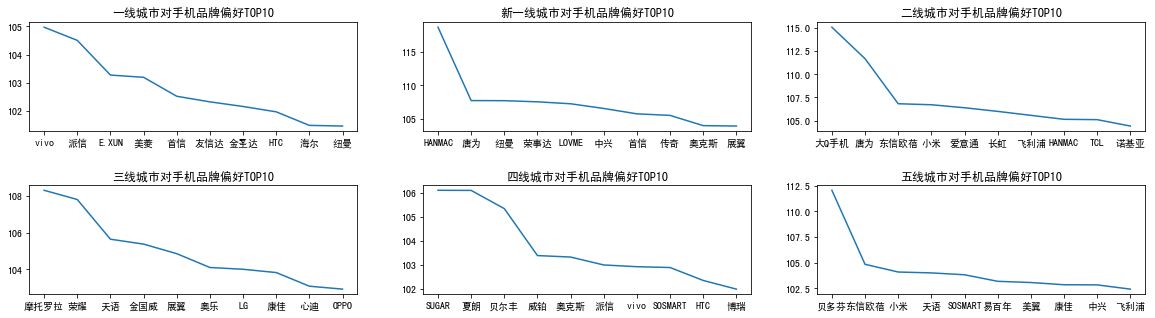

In [36]:
plt.figure(figsize = (20,8))
plt.subplot(331)
plt.plot(level1_phone_top10['title'].values,level1_phone_top10['TGI'].values)
plt.title('一线城市对手机品牌偏好TOP10')
plt.subplot(332)
plt.plot(levelnew1_phone_top10['title'].values,levelnew1_phone_top10['TGI'].values)
plt.title('新一线城市对手机品牌偏好TOP10')
plt.subplot(333)
plt.plot(level2_phone_top10['title'].values,level2_phone_top10['TGI'].values)
plt.title('二线城市对手机品牌偏好TOP10')
plt.subplot(334)
plt.plot(level3_phone_top10['title'].values,level3_phone_top10['TGI'].values)
plt.title('三线城市对手机品牌偏好TOP10')
plt.subplot(335)
plt.plot(level4_phone_top10['title'].values,level4_phone_top10['TGI'].values)
plt.title('四线城市对手机品牌偏好TOP10')
plt.subplot(336)
plt.plot(level5_phone_top10['title'].values,level5_phone_top10['TGI'].values)
plt.title('五线城市对手机品牌偏好TOP10')

plt.subplots_adjust(hspace=0.5) # hspace是设置子绘图区域高度间隔，wspace是设置宽度间隔

### 小结：
- 一线城市对'vivo', '派信', 'E.XUN'品牌手机的偏好度较高；
- 新一线城市对'HANMAC', '唐为', '纽曼'品牌手机的偏好度较高；
- 二线城市对'大Q手机', '唐为', '东信欧蓓'品牌手机的偏好度较高；
- 三线城市对'摩托罗拉', '荣耀', '天语'品牌手机的偏好度较高；
- 四线城市对'SUGAR', '夏朗', '贝尔丰'品牌手机的偏好度较高；
- 五线城市对'贝多芬', '东信欧蓓', '小米'品牌手机的偏好度较高；
- 偏好度高低与用户数多少不成正比。

# 三、RFM模型
- R：最近一次购买时间
- F：购买的频次
- M：购买的金额

In [2]:
# 由于df4把同一用户购买同品牌手机进行了去重，在构建RFM模型的时候是可以同一用户多次购买同款手机的，所以重新导入数据
df5 = pd.read_csv('jd3c_wash.csv',encoding='gbk')
# 显示所有列
pd.set_option('display.max_columns',None)
df5.head(2)

,Unnamed: 0,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_date,pid,amount,platform_no,payment_pattern_no,sell_point,price,cid,created,updated,title
0,0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,中南地区,104001,河南省,三门峡市,21-25岁,2018/3/1 13:34,1465909954,3,13,11001,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
1,1,1100003142,jAyfmdTuND,张天虹,34,2,15623916933,104001014,104,中南地区,104001,河南省,漯河市,31-35岁,2018/4/24 17:57,1465909954,5,12,11005,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME


In [3]:
df5.drop('Unnamed: 0',axis = 1,inplace = True)
df5.head(2)

,user_no,user_name,name,age,sex,phone_no,c_id,d_id,d_name,p_id,p_name,c_name,age_range,order_date,pid,amount,platform_no,payment_pattern_no,sell_point,price,cid,created,updated,title
0,1100003135,UJIpWuOrAE,卢雪,25,2,17668217965,104001007,104,中南地区,104001,河南省,三门峡市,21-25岁,2018/3/1 13:34,1465909954,3,13,11001,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME
1,1100003142,jAyfmdTuND,张天虹,34,2,15623916933,104001014,104,中南地区,104001,河南省,漯河市,31-35岁,2018/4/24 17:57,1465909954,5,12,11005,MTK6261顶配处理器 大屏幕大按键大喇叭 坚固耐用全新料 超高性价比 好评返10元话费,88,560,2015/3/8 21:32,2015/3/8 21:32,LOVME


In [4]:
# 购买时间最值
display(df5['order_date'].min())
display(df5['order_date'].max())

'2018/3/1 0:00'

'2018/6/9 8:15'

## 1.计算最近一次购买时间R
- 时间间隔是从2018年3月1日-2018年6月9日，这里选取2018年6月10日作为计算日期
- 统计客户最近发生购买行为的时间距离2018年6月10日间隔几天
- 再对间隔天数进行排名，间隔天数越小，排名越靠前。

In [6]:
# 按客户分组，获取最近购买时间
r_buy = df5.groupby('user_no')['order_date'].max().reset_index()
r_buy.head()

,user_no,order_date
0,1100003135,2018/5/3 21:13
1,1100003136,2018/5/2 12:52
2,1100003137,2018/5/3 17:33
3,1100003138,2018/5/2 17:13
4,1100003139,2018/5/5 15:45


In [7]:
# 获取间隔天数
# 将order_date转为日期类型，与目标日期相减，通过.days获取间隔天数
r_buy['r'] = r_buy[['order_date']].applymap(lambda x:(datetime.datetime(2018,6,10) - datetime.datetime.strptime(x[:8],'%Y/%m/%d')).days)
# 对r字段进行升序排序
r_buy.sort_values(by = 'r',axis = 0,inplace = True)
r_buy.head()

,user_no,order_date,r
1555,1230740100,2018/6/9 17:26,1
6460,1672860600,2018/6/9 16:20,1
7891,1801819400,2018/6/9 6:11,1
8359,1843832100,2018/6/9 18:18,1
9557,1951875600,2018/6/9 4:13,1


In [8]:
# 查看r_buy有多少条记录
len(r_buy)

10075

In [104]:
# .rank(ascending=True, method='dense') 默认升序排名，dense表示组间内加1,，即数值不同加1。
r_buy['r_rank'] = r_buy['r'].rank(method='dense').values.astype(int)
r_buy

,user_no,order_date,r,r_rank
1555,1230740100,2018/6/9 17:26,1,1
6460,1672860600,2018/6/9 16:20,1,1
7891,1801819400,2018/6/9 6:11,1,1
8359,1843832100,2018/6/9 18:18,1,1
9557,1951875600,2018/6/9 4:13,1,1
7521,1768489720,2018/6/9 8:15,1,1
858,1167923130,2018/6/9 15:36,1,1
3876,1439940820,2018/6/9 5:37,1,1
8872,1890112420,2018/6/9 19:29,1,1
838,1166120820,2018/6/9 18:39,1,1


In [91]:
#r_buy['r_rank'] = r_buy['r'].rank(method='dense').values.astype(int)
#r_buy

## 2.计算购买频次F
- 统计每个用户的购买次数，再对购买次数进行排名。购买次数越多，排名越靠前。

In [105]:
f_buy = df5.groupby('user_no')['user_name'].count().reset_index()
f_buy.sort_values(by = 'user_name',axis = 0,ascending = False,inplace = True)
f_buy['f_rank'] = f_buy['user_name'].rank(ascending = False,method='dense').values.astype(int)
f_buy.head()

,user_no,user_name,f_rank
3195,1378593000,125,1
5746,1608490000,119,2
1486,1224531030,95,3
1821,1254716680,93,4
6434,1670481050,93,4


## 3.计算购买金额M
- 统计每个用户的购买金额总数，进行排名。购买金额越大，排名越靠前。

In [79]:
# 创建一个金额字段，计算每笔订单购买金额
df5['money'] = df5['amount'] * df5['price']

In [106]:
m_buy = df5.groupby('user_no')['money'].sum().reset_index()
m_buy.sort_values(by = 'money',axis = 0,ascending = False,inplace = True)
m_buy['m_rank'] = m_buy['money'].rank(ascending = False,method='dense').values.astype(int)
m_buy.head()

,user_no,money,m_rank
216,1110157170,3185101,1
215,1110038380,2848060,2
1922,1263881130,2534884,3
4897,1531970880,2420789,4
5043,1545148800,2257321,5


In [107]:
# 把r_buy,f_buy,m_buy进行连接
rf = r_buy.merge(f_buy,left_on='user_no',right_on='user_no',how = 'left')
rfm = rf.merge(m_buy,left_on='user_no',right_on='user_no',how = 'left')
rfm

,user_no,order_date,r,r_rank,user_name,f_rank,money,m_rank
0,1230740100,2018/6/9 17:26,1,1,75,21,455987,1589
1,1672860600,2018/6/9 16:20,1,1,62,34,227635,8728
2,1801819400,2018/6/9 6:11,1,1,65,31,332044,4845
3,1843832100,2018/6/9 18:18,1,1,66,30,241244,8317
4,1951875600,2018/6/9 4:13,1,1,52,44,239786,8359
5,1768489720,2018/6/9 8:15,1,1,69,27,599570,367
6,1167923130,2018/6/9 15:36,1,1,56,40,165781,9791
7,1439940820,2018/6/9 5:37,1,1,83,13,615975,299
8,1890112420,2018/6/9 19:29,1,1,47,49,327244,5022
9,1166120820,2018/6/9 18:39,1,1,66,30,408526,2522


In [108]:
# 修改列名
rfm.rename(index=str,columns={'user_name':'f'},inplace = True)
rfm

,user_no,order_date,r,r_rank,f,f_rank,money,m_rank
0,1230740100,2018/6/9 17:26,1,1,75,21,455987,1589
1,1672860600,2018/6/9 16:20,1,1,62,34,227635,8728
2,1801819400,2018/6/9 6:11,1,1,65,31,332044,4845
3,1843832100,2018/6/9 18:18,1,1,66,30,241244,8317
4,1951875600,2018/6/9 4:13,1,1,52,44,239786,8359
5,1768489720,2018/6/9 8:15,1,1,69,27,599570,367
6,1167923130,2018/6/9 15:36,1,1,56,40,165781,9791
7,1439940820,2018/6/9 5:37,1,1,83,13,615975,299
8,1890112420,2018/6/9 19:29,1,1,47,49,327244,5022
9,1166120820,2018/6/9 18:39,1,1,66,30,408526,2522


## 4.RFM用户分类

In [117]:
# 对10075名用户进行打分，排名在前1/4的用户打4分，1/4到2/4的用户打3分，2/4到3/4的用户打2分，剩余的1/4打1分。
display(max(rfm['r_rank']))
display(max(rfm['f_rank']))
display(max(rfm['m_rank']))

25

60

9942

In [118]:
# 抽取函数
def r_func(x):
    if x <= max(rfm['r_rank'])/4:
        return 4
    elif x <= max(rfm['r_rank'])/2:
        return 3
    elif x <= max(rfm['r_rank'])*(3/4):
        return 2
    else:
        return 1
    
def f_func(x):
    if x <= max(rfm['f_rank'])/4:
        return 4
    elif x <= max(rfm['f_rank'])/2:
        return 3
    elif x <= max(rfm['f_rank'])*(3/4):
        return 2
    else:
        return 1

def m_func(x):
    if x <= max(rfm['m_rank'])/4:
        return 4
    elif x <= max(rfm['m_rank'])/2:
        return 3
    elif x <= max(rfm['m_rank'])*(3/4):
        return 2
    else:
        return 1

In [119]:
rfm['r_score'] = rfm['r_rank'].apply(r_func)
rfm['f_score'] = rfm['f_rank'].apply(f_func)
rfm['m_score'] = rfm['m_rank'].apply(m_func)
rfm.sample(10)

,user_no,order_date,r,r_rank,f,f_rank,money,m_rank,r_score,f_score,m_score
4198,1755156490,2018/5/3 18:31,38,16,66,30,370439,3538,2,3,3
3995,1800027290,2018/5/3 15:14,38,16,86,10,444235,1824,2,4,4
4379,1196770780,2018/5/3 14:38,38,16,70,26,383306,3169,2,3,3
9169,1366026000,2018/5/1 3:11,40,18,71,25,295418,6273,2,3,2
2910,1908488810,2018/5/3 4:34,38,16,69,27,210217,9158,2,3,1
3290,1997072530,2018/5/3 6:48,38,16,57,39,293679,6346,2,2,2
8343,1320168630,2018/5/2 18:11,39,17,75,21,366111,3694,2,3,3
5095,1294076440,2018/5/3 6:11,38,16,63,33,333145,4810,2,2,3
8974,1212181520,2018/5/1 3:37,40,18,60,36,375298,3403,2,2,3
4754,1192794400,2018/5/3 5:22,38,16,61,35,385372,3116,2,2,3


### 4.1给用户贴标签
方法1：
- 根据需求配备rfm的权重来贴标签
- 比如r：f：m = 3:2:1，表示r_score>3，f_score>2，m_score>1 即为重要价值用户

方法2：
- 根据均值来贴标签
- 表示r_score>r.score.mean()，f_score>f.score.mean()，m_score>f.score.mean() 即为重要价值用户

In [128]:
# 这里使用方法2
display(rfm['r_score'].mean())
display(rfm['f_score'].mean())
display(rfm['m_score'].mean())

1.95424317617866

2.3362779156327544

2.4977667493796525

In [148]:
# 构建函数
def func(x):
    lst = []
    for i in range(len(x)):
        if x[i] >= x.mean(): 
            lst.append(1)
        else:
            lst.append(0)
    return lst


In [152]:
# 调用函数
rfm['r_01'] = func(rfm['r_score'])
rfm['f_01'] = func(rfm['f_score'])
rfm['m_01'] = func(rfm['m_score'])

In [153]:
rfm.sample(10)

,user_no,order_date,r,r_rank,f,f_rank,money,m_rank,r_score,f_score,m_score,r_01,f_01,m_01
8494,1466279800,2018/5/1 12:19,40,18,63,33,608702,331,2,2,4,1,0,1
3251,1965737750,2018/5/3 11:03,38,16,50,46,219250,8945,2,1,1,1,0,0
7939,1505717700,2018/5/2 4:29,39,17,59,37,431931,2040,2,2,4,1,0,1
7344,1422989540,2018/5/2 8:01,39,17,75,21,468140,1408,2,3,4,1,1,1
1766,1439098700,2018/5/4 18:21,37,15,75,21,370054,3555,2,3,3,1,1,1
5308,1317673720,2018/5/3 20:30,38,16,55,41,355520,4024,2,2,3,1,0,1
2552,1589127710,2018/5/3 6:31,38,16,59,37,349793,4220,2,2,3,1,0,1
9790,1540488800,2018/4/9 23:03,62,19,59,37,221662,8878,1,2,1,0,0,0
1456,1691068390,2018/5/4 13:33,37,15,62,34,600976,361,2,2,4,1,0,1
4580,1173995300,2018/5/3 18:08,38,16,68,28,297686,6198,2,3,2,1,1,0


### 4.2分为8个标签
- 重要价值用户：r高 f高 m高（111）
- 重要唤回用户：r低 f高 m高（011）
- 重要深耕用户：r高 f低 m高（101）
- 重要挽回用户：r低 f低 m高（001）
- 潜力用户：r高 f高 m低（110）
- 新用户：r高 f低 m低（100）
- 一般维持用户：r低 f高 m低（010）
- 流失用户：r低 f低 m低（000）

In [155]:
rfm['r_01'][0]

1

In [191]:
# 构建分标签函数
def fun_tag(x):
    if x[0] == 1 and x[1] == 1 and x[2] == 1: # 进来的第一行数据是[1,1,1]，这里要分别取索引0，1，2进行比较
        return '重要价值用户'
    elif x[0] == 0 and x[1] == 1 and x[2] == 1:
        return '重要换回用户'
    elif x[0] == 1 and x[1] == 0 and x[2] == 1:
        return '重要深耕用户'
    elif x[0] == 0 and x[1] == 0 and x[2] == 1:
        return '重要挽回用户'
    elif x[0] == 1 and x[1] == 1 and x[2] == 0:
        return '潜力用户'
    elif x[0] == 1 and x[1] == 0 and x[2] == 0:
        return '新用户'
    elif x[0] == 0 and x[1] == 1 and x[2] == 0:
        return '一般维持用户'
    else:
        return '流失用户'

In [192]:
# apply默认是把每一列看做一个元素进行映射转换
# 这里设置axis = 1，即把每一行看做一个元素进行映射转换
rfm['tag'] = rfm[['r_01','f_01','m_01']].apply(fun_tag,axis = 1) 

In [193]:
rfm['tag'].unique()

array(['重要价值用户', '新用户', '重要深耕用户', '潜力用户', '重要挽回用户', '流失用户', '重要换回用户',
       '一般维持用户'], dtype=object)

In [194]:
rfm.sample(10)

,user_no,order_date,r,r_rank,f,f_rank,money,m_rank,r_score,f_score,m_score,r_01,f_01,m_01,tag
7449,1439417870,2018/5/2 21:55,39,17,59,37,307680,5775,2,2,2,1,0,0,新用户
6471,1766729460,2018/5/2 10:11,39,17,72,24,354657,4050,2,3,3,1,1,1,重要价值用户
4047,1829921090,2018/5/3 1:24,38,16,69,27,341479,4522,2,3,3,1,1,1,重要价值用户
6686,1947694850,2018/5/2 6:58,39,17,73,23,529052,739,2,3,4,1,1,1,重要价值用户
487,1699122900,2018/5/5 6:47,36,14,55,41,272899,7180,2,2,2,1,0,0,新用户
6076,1778733600,2018/5/2 20:48,39,17,45,51,262846,7582,2,1,1,1,0,0,新用户
7485,1654041450,2018/5/2 10:28,39,17,71,25,394049,2881,2,3,3,1,1,1,重要价值用户
1206,1103415700,2018/5/5 21:25,36,14,65,31,435563,1965,2,2,4,1,0,1,重要深耕用户
1241,1768311040,2018/5/4 14:23,37,15,71,25,649583,209,2,3,4,1,1,1,重要价值用户
6914,1239531060,2018/5/2 6:44,39,17,55,41,256809,7800,2,2,1,1,0,0,新用户


### 4.3不同用户类型的人数

In [234]:
rfm_num = rfm.groupby('tag').agg({'tag':'count'})
rfm_num.sort_values(by = 'tag',ascending = True,inplace = True)
rfm_num

,tag
tag,
一般维持用户,52
重要换回用户,119
重要挽回用户,182
流失用户,287
潜力用户,1148
重要深耕用户,2269
重要价值用户,2455
新用户,3563


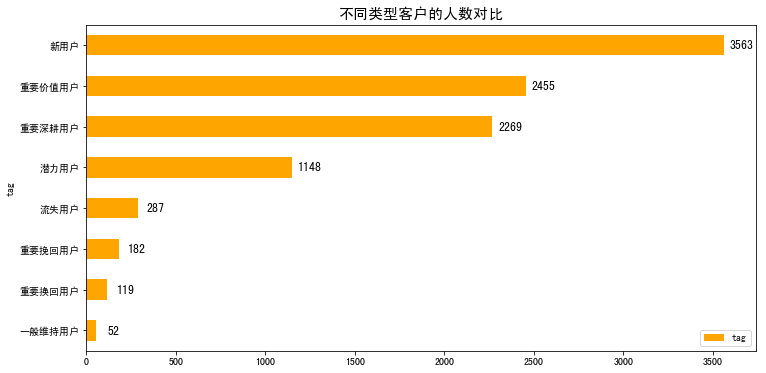

In [235]:
rfm_num.plot(kind = 'barh',figsize=(12,6),color = 'orange')
plt.title("不同类型客户的人数对比",fontsize= 15)
x = rfm_num.index
y = rfm_num['tag']
for x,y in enumerate(y):
    plt.text(y+100,x,y,ha="center",va="center",fontsize=12)